**Table of contents**<a id='toc0_'></a>    
- [Résumé](#toc1_)    
  - [Problématique](#toc1_1_)    
  - [Tour d'horizon](#toc1_2_)    
  - [Nettoyage et Feature Engineering](#toc1_3_)    
  - [Jeu de données clients](#toc1_4_)    
  - [Segmentation marketing](#toc1_5_)    
- [Introduction](#toc2_)    
  - [RGPD](#toc2_1_)    
  - [Imports et prérequis](#toc2_2_)    
  - [Fonctions spécifiques](#toc2_3_)    
  - [Chargement des données](#toc2_4_)    
- [Agrégation des données](#toc3_)    
  - [Traduction des catégories de produits](#toc3_1_)    
  - [Méthodologie : plus petit au plus grand](#toc3_2_)    
  - [Articles $∪$ Produits](#toc3_3_)    
  - [$∪$ Commandes](#toc3_4_)    
  - [$∪$ Vendeurs](#toc3_5_)    
  - [$∪$ Clients](#toc3_6_)    
  - [$∪$ Avis clients](#toc3_7_)    
  - [$∪$ Paiements](#toc3_8_)    
  - [$∪$ Géolocalisation](#toc3_9_)    
  - [Jeu de données brut](#toc3_10_)    
  - [Date des données](#toc3_11_)    
  - [Nettoyage](#toc3_12_)    
- [Tour d'horizon](#toc4_)    
  - [Constat](#toc4_1_)    
- [Nettoyage et Feature Engineering](#toc5_)    
  - [Catégories de produits : nettoyage](#toc5_1_)    
  - [Volume d'un produit](#toc5_2_)    
  - [CA et commandes](#toc5_3_)    
  - [Articles et clients](#toc5_4_)    
  - [Paiement](#toc5_5_)    
  - [Délais de commande](#toc5_6_)    
  - [Distances client ↔ vendeur](#toc5_7_)    
  - [Frais de port](#toc5_8_)    
  - [Commentaires](#toc5_9_)    
  - [Saisonnalité](#toc5_10_)    
- [Jeu de données clients](#toc6_)    
- [Segmentation marketing et stratégie](#toc7_)    
  - [Analyse RFM](#toc7_1_)    
- [Réduction de dimensions](#toc8_)    
  - [Normalisation](#toc8_1_)    
  - [PCA](#toc8_2_)    
  - [t-SNE](#toc8_3_)    
  - [Fin du pré-traitement des données](#toc8_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=2
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Résumé](#toc0_)

Liens utiles :
- [notebook de l'analyse exploratoire](./P4_EDA.ipynb)
- [notebook des approches de modélisation](./P4_models.ipynb)
- [notebook de mise à jour de la segmentation](./P4_simul.ipynb)
- [projet OC](https://openclassrooms.com/fr/paths/794/projects/1502/assignment)

Sources métier :
- [données](https://www.kaggle.com/olistbr/brazilian-ecommerce)
- [Segmentation RFM](https://www.definitions-marketing.com/definition/segmentation-rfm/)

## <a id='toc1_1_'></a>[Problématique](#toc0_)

**Olist** souhaite fournir à ses équipes d'e-commerce une **segmentation des clients** qu'elles pourront utiliser au quotidien pour leurs campagnes de communication.  
L'objectif est de **comprendre les différents types d'utilisateurs** grâce à leur **comportement** et à leurs **données personnelles**.

À fournir :
- une **description actionable de la segmentation** et de sa logique sous-jacente pour une utilisation optimale
- une **proposition de contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps

## <a id='toc1_2_'></a>[Tour d'horizon](#toc0_)

Olist fournit 2 années de données très complètes qui permettent une segmentation marketing.  
Après [**agrégation**](#toc3_) des 9 tables qui composent la base de données initiale et un rapide nettoyage, on constate :
- qu'il reste beaucoup de variables : il est nécessaire de **filtrer et regrouper** ces données autant que possible pour les étudier en détails
- la nécessité d'un [**feature engineering**](#toc5_) : certaines informations précieuses pour la segmentation sont à construire

## <a id='toc1_3_'></a>[Nettoyage et Feature Engineering](#toc0_)

- regroupement des catégories de produits initiales en 5 catégories : fashion_beauty, food_kitchen, leisure, house, pro_it
- regroupement des dimensions physiques d'un produit en une seule : son volume
- création de **nombreuses variables orientées client** :
  - CA total
  - nombre de commande(s)
  - panier moyen
  - catégories d'articles favorites
  - nombre d'articles achetés
  - nombre moyen d'articles par commande
  - prix moyen d'un article
  - volume moyen d'un article
  - poids moyen d'un article
  - longueur moyenne de la description des articles achetés
  - longueur moyenne du nom des articles achetés
  - nombre de photos moyen des articles achetés
  - type de paiement préféré
  - nombre de jours depuis la dernière commande
  - temps de livraison moyen
  - nombre de jours moyen entre deux commandes
  - distance moyenne avec les vendeurs
  - frais de port moyens par commande
  - part des frais de port dans le CA client
  - nombre de commentaires produits laissés
  - note moyenne des commentaires laissés

Après **constats de saisonnalité** et une **pondération par CA** pour les multi-modalités éventuelles, les variables de saisonnalité sont entrées pour chaque client sur 3 échelles :
 - annuelle (semaines de l'année favorite)
 - hebdomadaire (jours de la semaine préféré)
 - journalière (heure de la journée favorite)

Ces actions mènent à la création d'un **jeu de données unique et adapté** de dimensions (107927, 70).

## <a id='toc1_4_'></a>[Jeu de données clients](#toc0_)

Création d'un jeu de données de taille (91043, 28) **centré sur les clients** et comportant les **variables les plus utiles** du jeu de données global.

## <a id='toc1_5_'></a>[Segmentation marketing](#toc0_)

Le constat de l'**inapplicabilité d'une segmentation RFM** (récence, fréquence, montant) - avec notamment une clientèle de passage (non fidèle) à plus de 98% - entraîne le choix d'une **segmentation non supervisée**.

Pour préparer les modélisations à suivre, les données sont :
- pré-traitées avec une [**normalisation**](#toc8_1_) 
- puis réduites avec une [**ACP**](#toc8_2_)
- suivie d'une [**t-SNE**](#toc8_3_)
- et enfin exportées.

# <a id='toc2_'></a>[Introduction](#toc0_)

## <a id='toc2_1_'></a>[RGPD](#toc0_)

Les 5 grands principes des RGPD (Règlement Général sur la Protection des Données) **ne s'appliquent pas pour ces données, puisqu'il n'y a aucune information permettant d'identifier quelque personne** puisque tout a été **anonymisé en amont**.

Pour rappel, les principes sont les suivants :
- **finalité** : le responsable d'un fichier ne peut enregistrer et utiliser des informations sur des personnes physiques que dans un but bien précis, légal et légitime ;
- **proportionnalité et pertinence** : les informations enregistrées doivent être pertinentes et strictement nécessaires au regard de la finalité du fichier ;
- **durée de conservation limitée** : il n'est pas possible de conserver des informations sur des personnes physiques dans un fichier pour une durée indéfinie. Une durée de conservation précise doit être fixée, en fonction du type d'information enregistrée et de la finalité du fichier ;
- **sécurité et confidentialité** : le responsable du fichier doit garantir la sécurité des informations qu'il détient. Il doit en particulier veiller à ce que seules les personnes autorisées aient accès à ces informations ;
- **droits des personnes**

## <a id='toc2_2_'></a>[Imports et prérequis](#toc0_)

Pré-requis de fonctionnement :

Packages utilisés :

```
Python 3.11.6
-----
dill                0.3.7
geopy               2.4.1
IPython             8.18.1
jupyter_client      8.6.0
jupyter_core        5.5.0
jupyterlab          4.0.9
matplotlib          3.8.2
notebook            7.0.6
numpy               1.26.2
pandas              2.1.3
pandasgui           0.2.14
plotly              5.18.0
seaborn             0.13.0
session_info        1.0.0
sklearn             1.3.2
Unidecode           1.3.7
```

In [2]:
# native
import logging
import dill as pickle # pickle extension for dataframes
from datetime import timedelta

# data science
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# graphics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandasgui

# special
from unidecode import unidecode
from geopy import distance

# PLOTLY render in GitHub & NBViewer
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# PANDAS prevent warnings
pd.options.mode.chained_assignment = None

# LOGGING configuration (see all outputs, even DEBUG or INFO)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

## <a id='toc2_3_'></a>[Fonctions spécifiques](#toc0_)

### Tour d'horizon

In [3]:
def make_autopct(values):
    """
    ==> Obtained from StackOverflow <==
    Upgrades plt.pie(autopct=""), displaying percentages and values.
    
    Input: list of numeric values or Pandas.Series
    Output: string with percentage and value
    """

    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    
    return my_autopct

def plot_dtypes(df):
    """
    Quick data types pie view.

    Input: dataframe
    Output: pie plot

    Requirements: pandas, matplotplib
    """

    data_types = df.dtypes.value_counts()

    plt.pie(
        data_types,
        labels=data_types.index,
        autopct=make_autopct(data_types),
    )
    plt.show()

def nan_warn(df, nan_col="nan_pct", tags_col="tags", thresh=0.4):
    """
    Warns if NaNs outpass a defined threshold,
    warning showed as a tag in the dataframe on a defined column.

    Inputs:
    • df: dataframe
    • nan_col: dataframe column (string, default = "nan")
    • tags_col: dataframe column (string, default = "tags")
    • thresh: threshold for NaNs warning (float, default = 0.4)

    Output: modified dataframe

    Requirements: pandas
    """

    df_ = df.copy()
    mask = df_[nan_col] / 100 >= thresh
    df_.loc[mask, tags_col] = df_.loc[mask, tags_col] + "🚫"

    return df_

def type_tag(
        df, uni_col="unique", type_col="type", count_col="count",
        tags_col="tags"):
    """
    Defines a type tag of a dataframe feature,
    depending on unique values, count and dtype,
    and writes it in a tag column.

    Inputs:
    • df: dataframe
    • uni_col: dataframe column (string, default = "unique")
    • type_col: dataframe column (string, default = "type")
    • count_col: dataframe column (string, default = "type")
    • tags_col: dataframe column (string, default = "tags")

    Output: modified dataframe

    Requirements: pandas
    """

    df_ = df.copy()
    total_count = max(df_[count_col])

    # const warn
    const_mask = df_[uni_col] == 1
    df_.loc[const_mask, tags_col] = df_.loc[const_mask, tags_col] + "🔒"

    # unique warn
    uniq_mask = df_[uni_col] == total_count
    df_.loc[uniq_mask, tags_col] = df_.loc[uniq_mask, tags_col] + "💎"

    # bool = categorical feat
    is_bool_mask = df_[type_col] == "bool"
    df_.loc[is_bool_mask, tags_col] = df_.loc[is_bool_mask, tags_col] + "📦"
    
    # object categorical feat
    type_mask = df_[type_col] == "object"
    # define limit
    categ_limit = int(max(2, min(60, total_count / 1.2)))
    # filter
    categ_mask = df_[uni_col].between(2, categ_limit)
    df_.loc[(categ_mask & type_mask), tags_col] = df_.loc[
        (categ_mask & type_mask), tags_col] + "📦"

    return df_

def describe_df(df, nan_thresh=0.4):
    """
    Dataframe describer, include little more information than .describe()

    Inputs:
    • df: dataframe to be analysed
    • nan_thresh: threshold for NaNs warning (float, default = 0.4)

    Output: dataframe of data description

    Requirements: pandas, numpy
    """

    df_ = df.describe(include="all").T
    df_.sort_index(inplace=True)
    df_["unique"] = df.nunique()
    df_["type"] = df.dtypes
    df_["nan"] = df.isna().sum()
    df_["nan_pct"] = np.round(df.isna().mean()*100, 2)
    
    # tags column
    df_.insert(0, "tags", "")
    # nan warning tag
    df_ = nan_warn(df_, thresh=nan_thresh)
    # type check + const warn tag
    df_ = type_tag(df_,
        uni_col="unique",
        type_col="type",
        count_col="count",
        tags_col="tags",
    )
    
    df_ = df_.fillna("-")

    return df_

def show_duplicates(df):
    """
    Counts duplicates of a dataframe, plus eventually shows them.

    Input: dataframe
    Outputs:
    • duplicates count (int)
    • duplicates (dataframe)

    Requirements: pandas
    """
    
    duplicated_count = df.duplicated().sum()
    df_duplicated = df[df.duplicated()]

    if duplicated_count:
        print(f"{duplicated_count} duplicates:")
        display(df_duplicated)
    else:
        print("No duplicate.")
        
    return duplicated_count, df_duplicated

def show_no_index(df):
    """
    Counts empty indexes of a dataframe, plus eventually shows concerned rows.

    Input: dataframe
    Outputs:
    • empty indexes count (int)
    • empty indexed rows (dataframe)

    Requirements: pandas
    """
    
    no_index_count = df.index.isna().sum()
    df_no_index = df[df.index.isna()]

    if no_index_count:
        print(f"{no_index_count} empty indexes:")
        display(df_no_index)
    else:
        print("No empty index.")
        
    return no_index_count, df_no_index

def data_overview(df, width_miss_prct=8, nan_thresh=0.4):
    """
    Quick data overview with usual indicators.

    Inputs:
    • df: dataframe
    • width_miss_prct: width for features missing plot (int, default = 8)
    • nan_thresh: threshold for NaNs warning (float, default = 0.4)

    Outputs:
    • data types pie plot
    • dataframe complete description
    • duplicates (count and eventually show)
        -> output[0] = duplicated_count (int)
        -> output[1] = df_duplicated (dataframe)
    • empty indexes (count and eventually show)
        -> output[0] = no_index_count (int)
        -> output[1] = df_no_index (dataframe)

    Requirements: numpy, pandas, matplotlib
    """
    
    with pd.option_context('display.max_rows', 100):
        print(f"Data shape : {df.shape}")
        dup = show_duplicates(df)
        no_index = show_no_index(df)

        # plot data types
        print("\nDATA TYPES")
        plot_dtypes(df)
        
        # full dataframe description
        print("\nDATA QUICK DESCRIPTION")
        display(describe_df(df, nan_thresh=nan_thresh))
        
    # outputs:
    # [0] = duplicated_count, df_duplicated
    # [1] = no_index_count, df_no_index
    return dup, no_index


### Nettoyage des données

In [4]:
def merge_df(df_1, df_2, column):
    """
    Left joins 2 dataframes, checks merge and returns merged dataframe.

    Inputs:
    -> df_1: first dataframe
    -> df_2: a second dataframe to left join
    -> column: column used for the merge (string)

    Output:
    -> merged dataframe
    """

    df_ = pd.merge(df_1, df_2, on=column, how="left")

    print(f"Checking shapes:\n{df_1.shape} + {df_2.shape}\n= {df_.shape}")

    # check if merge ok with columns
    cols_merged = sorted(list(df_.columns))
    cols_added = sorted(list(df_1.columns.append(df_2.columns)))
    cols_added.remove(column)
    print("Merge ok") if cols_merged == cols_added else print("⚠️ Columns")

    return df_

def impact_classif(value, thresh=30):
    """
    Returns an impact classification depending on a value
    and a threshold.

    Positional arguments: 
    -------------------------------------
    value: float or int: between 0 and 100

    Optional arguments: 
    -------------------------------------
    thresh: float or int: threshold to adjust the function, default=30

    Output: string, warning intensity (int)
    """

    if value == 0:
        return "⌀", False
    elif 0 < value < (thresh / 6):
        return "--", False
    elif (thresh / 6) <= value < (thresh / 3):
        return "-", False
    elif (thresh / 3) <= value < (thresh * 2 / 3):
        return "+", False
    elif (thresh * 2 / 3) <= value < thresh:
        return "++", False
    elif thresh <= value < (thresh + (thresh / 3)):
        return "⚠️", 1
    elif (thresh + (thresh / 3)) <= value < (thresh + (2 * thresh / 3)):
        return "⚠️⚠️", 2
    elif (thresh + (2 * thresh / 3)) <= value < 75:
        return "⚠️⚠️⚠️", 3
    elif value >= 75:
        return "☠️", 4
    else:
        return "❓", False

def impact(df_before, df_after, monitored=None):
    """
    Returns an impact dataframe from an original and
    a second dataframe.
    Impact is calculated on the columns and population,
    plus on some optional arguments.

    Positional arguments: 
    -------------------------------------
    df_before: dataframe: original dataframe (starting point, before action)
    df_before: dataframe: original dataframe (starting point, after action)

    Optional arguments: 
    -------------------------------------
    monitored: list of strings: Columns to check.
               ⚠️ Columns must be present in both dataframes.
               Default = None

    Output: dataframe in logging.info()

    Required modules: pandas, numpy, logging
    """

    pop_bef = df_before.shape[0]
    cols_bef = df_before.shape[1]
    
    pop_aft = df_after.shape[0]
    cols_aft = df_after.shape[1]

    diff_pop = pop_bef - pop_aft
    diff_cols = cols_bef - cols_aft

    prct_pop_num = np.round(diff_pop / pop_bef * 100, 2)
    prct_cols_num = np.round(diff_cols / cols_bef * 100, 2)
    prct_pop = f"{prct_pop_num}%"
    prct_cols = f"{prct_cols_num}%"

    imp_cols = impact_classif(prct_cols_num)
    imp_pop = impact_classif(prct_pop_num)

    # list of potential warnings
    warn_logs = [imp_cols[1], imp_pop[1]]

    _df_ = pd.DataFrame([
        [cols_bef, pop_bef],
        [cols_aft, pop_aft],
        [diff_cols, diff_pop],
        [prct_cols, prct_pop],
        [imp_cols[0], imp_pop[0]]],
        columns=["Columns", "Population"],
        index=["Before", "After", "Difference", "Prct", "IMPACT"]
    )
    

    if monitored:
        for m in monitored:
            # get output from command
            before_ = df_before[m].count()
            after_ = df_after[m].count()
            prct_ = np.round((before_ - after_) / before_ * 100, 2)
            imp = impact_classif(prct_)
            # add in DF
            _df_[m] = [before_,
                    after_,
                    before_ - after_,
                    f"{prct_}%",
                    imp[0]
            ]
            # add potential warning
            warn_logs.append(imp[1])

    if (1 in warn_logs or 2 in warn_logs or 3 in warn_logs):
        return logging.warning(display(_df_))
    elif 4 in warn_logs:
        return logging.critical(display(_df_))
    else:
        return logging.info(display(_df_))

def str_to_ts(date_str):
    """
    Changes a "%Y-%m-%d %H:%M:%S" string date to a timestamp.
    """

    ts = pd.Timestamp(date_str).timestamp()

    return ts

def ts_to_dt(timestamp):
    """
    Changes a timestamp to a datetime object.
    """

    dt = pd.Timestamp(timestamp, unit='s').strftime('%Y-%m-%d %X')

    return dt

def super_categ(category):
    """
    From a category name, return a super-category.
    """

    if category in fashion_beauty:
        return 'fashion_beauty'
    elif category in food_kitchen:
        return 'food_kitchen'
    elif category in leisure:
        return 'leisure'
    elif category in house:
        return 'house'
    elif category in pro_it:
        return 'pro_it'
    else:
        return np.NaN

def get_max_gs_mode(x):
    """
    For a given customer ID, returns a series containing gross sales
    weightened temporal modes for week, day of week and hour.

    Input:
    • x: Series containing "cust_id" feature

    Output:
    • x["cust_id"]: the given customer ID (string)
    • w_max: gross sales weightened mode for week of year (int)
    • dow_max: gross sales weightened mode for day of week (int)
    • h_max: gross sales weightened mode for hour of day (int)
    """

    # get orders data from filtered dataframe
    c_df = df_orders_season.loc[df_orders_season["cust_id"] == x["cust_id"]]

    # find modes
    w_modes = c_df["w"].mode().values
    dow_modes = c_df["dow"].mode().values
    h_modes = c_df["h"].mode().values

    # get total gs per unique value
    w_gs = c_df.groupby("w")["gs"].agg("sum")
    dow_gs = c_df.groupby("dow")["gs"].agg("sum")
    h_gs = c_df.groupby("h")["gs"].agg("sum")

    # restrict chosen unique values to modes (order frequence first)
    w_gs = w_gs.loc[w_gs.index.isin(w_modes)]
    dow_gs = dow_gs.loc[dow_gs.index.isin(dow_modes)]
    h_gs = h_gs.loc[h_gs.index.isin(h_modes)]

    # for equivalent frequencies, keep those that generated max GS
    w_max = w_gs.idxmax()
    dow_max = dow_gs.idxmax()
    h_max = h_gs.idxmax()

    return x["cust_id"], w_max, dow_max, h_max

def distance_gps(lat1, long1, lat2, long2):
    """
    Returns a distance in kilometers between 2 (A,B) GPS points (lat, long).

    Input:
    • lat1: latitude of point A
    • long1: latitude of point A
    • lat2: latitude of point B
    • long2: latitude of point B

    Output:
    • distance in kilometers (float), round 3 (1 meter).
    """

    a_coords = (lat1, long1)
    b_coords = (lat2, long2)
    dist = round(distance.geodesic(a_coords, b_coords).km, 3)

    return dist


### EDA

In [5]:
def distri_cor(
        df, features, target=None, boxplot=True, pairplot=False, corr=False,
        title=None):
    """
    Quick graphic tour of the distribution with boxplots, pairplot andx
    correlation heatmap.

    Inputs:
    • df: dataframe
    • features: features to plot (list of strings, don't forget target)
    • target: target feature for pairplot hue (string, default = None)
    • boxplot: shows boxplots if True (bool, default = True)
    • pairplot: shows pairplot if True (bool, default = False)
    • corr: shows correlation matrix if True (bool, default = False)
    • title: plot title (string, default = None)

    Outputs:
    • selected plots

    Requirements: pandas, numpy, seaborn, plotly
    """

    df_ = df[features]

    if boxplot:

        # setup display
        if len(features) < 7:
            cols = len(features)
            rows=1
        else:
            cols=6
            rows = int(np.ceil(len(features) / cols))
        fig = make_subplots(rows=rows, cols=cols)

        # plot each boxplot within display
        r = 0
        for i,f in enumerate(df_.columns):
            c = (i % cols) + 1
            # next row
            if c == 1: r += 1
            # plot it
            fig.add_trace(
                go.Box(y=df[f], name=f, showlegend=False, boxmean='sd' ),
                row=r, col=c,
                )

        fig.update_xaxes(tickangle=45)
        fig.update_layout(
            height=600 * r,
            margin=dict(l=20, r=20),
            )
        if title:
            fig.update_layout(title=title)
        fig.show()
        
    if pairplot:
        sns.pairplot(
            df_,
            corner=True,
            hue=target,
            plot_kws={"s": 2}, # reduced dots size to avoid overplotting
        )
        
        if title:
            plt.title(title)
        plt.show()

    if corr:
        # matrix correlation
        corr_mtx = df.corr(numeric_only=True).round(3)

        # mask for the upper half
        mask = np.triu(np.ones_like(corr_mtx, dtype=bool))

        f, ax = plt.subplots(figsize=(11, 7))
        sns.heatmap(corr_mtx,
            annot = True,
            mask=mask,
            linewidths=.5,
        )

        if title:
            plt.title(title)
        plt.show()

    return


## <a id='toc2_4_'></a>[Chargement des données](#toc0_)

In [6]:
DATASETS_PATH = "C:\\Users\\jlemaire\\bdd\\oc_p4\\"

DS_CATEG_TRANSLAT = "product_category_name_translation.csv"
DS_CUSTOMERS = "olist_customers_dataset.csv"
DS_GEOLOC = "olist_geolocation_dataset.csv"
DS_ITEMS = "olist_order_items_dataset.csv"
DS_ORDERS = "olist_orders_dataset.csv"
DS_PAYMENTS = "olist_order_payments_dataset.csv"
DS_PRODUCTS = "olist_products_dataset.csv"
DS_REVIEWS = "olist_order_reviews_dataset.csv"
DS_SELLERS = "olist_sellers_dataset.csv"

In [7]:
df_categ_translat = pd.read_csv(DATASETS_PATH + DS_CATEG_TRANSLAT)
df_customers = pd.read_csv(DATASETS_PATH + DS_CUSTOMERS)
df_geoloc = pd.read_csv(DATASETS_PATH + DS_GEOLOC)
df_items = pd.read_csv(DATASETS_PATH + DS_ITEMS)
df_orders = pd.read_csv(DATASETS_PATH + DS_ORDERS)
df_payments = pd.read_csv(DATASETS_PATH + DS_PAYMENTS)
df_products = pd.read_csv(DATASETS_PATH + DS_PRODUCTS)
df_reviews = pd.read_csv(DATASETS_PATH + DS_REVIEWS)
df_sellers = pd.read_csv(DATASETS_PATH + DS_SELLERS)

# <a id='toc3_'></a>[Agrégation des données](#toc0_)

La base de données est répartie en **9 tables différentes**, qu'il est possible de **combiner en un seul jeu de données pour faciliter les traitements** à venir.

## <a id='toc3_1_'></a>[Traduction des catégories de produits](#toc0_)

Une première manipulation est d'ores-et-déjà applicable : afin d'éviter une erreur de traduction, les **catégories de produits peuvent être traduites** avant de supprimer la table `product_category_name_translation.csv` :

In [8]:
df_products["product_category_name"].replace(
    df_categ_translat["product_category_name"].values,
    df_categ_translat["product_category_name_english"].values,
    inplace=True)
print(df_products["product_category_name"].nunique())

73


In [9]:
_ = df_products.loc[~df_products["product_category_name"]\
        .isin(df_categ_translat["product_category_name_english"])]
not_translated = _["product_category_name"].unique()[1:]
print(not_translated)

['pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


2 valeurs de catégories de produits n'apparaissent pas dans le tableau de traduction, il est possible de les modifier manuellement :

In [10]:
translation = ["computers", "la_cuisine"]

df_products["product_category_name"].replace(
    not_translated, translation, inplace=True)

describe_df(df_products)

tags    count  unique  \
product_category_name            32341.0      71   
product_description_lenght       32341.0    2960   
product_height_cm                32949.0     102   
product_id                    💎  32951.0   32951   
product_length_cm                32949.0      99   
product_name_lenght              32341.0      66   
product_photos_qty               32341.0      19   
product_weight_g                 32949.0    2204   
product_width_cm                 32949.0      95   

                                                         top  freq  \
product_category_name                         bed_bath_table  3029   
product_description_lenght                                 -     -   
product_height_cm                                          -     -   
product_id                  1e9e8ef04dbcff4541ed26657ea517e5     1   
product_length_cm                                          -     -   
product_name_lenght                                        -     -   
product_photos_qty                                         -     -   
product_weight_g                                           -     -   
product_width_cm                                           -     -   

                                   mean          std  min    25%    50%  \
product_category_name                 -            -    -      -      -   
product_description_lenght   771.495285   635.115225  4.0  339.0  595.0   
product_height_cm             16.937661    13.637554  2.0    8.0   13.0   
product_id                            -            -    -      -      -   
product_length_cm             30.815078    16.914458  7.0   18.0   25.0   
product_name_lenght           48.476949    10.245741  5.0   42.0   51.0   
product_photos_qty             2.188986     1.736766  1.0    1.0    1.0   
product_weight_g            2276.472488  4282.038731  0.0  300.0  700.0   
product_width_cm              23.196728    12.079047  6.0   15.0   20.0   

                               75%      max     type  nan  nan_pct  
product_category_name            -        -   object  610     1.85  
product_description_lenght   972.0   3992.0  float64  610     1.85  
product_height_cm             21.0    105.0  float64    2     0.01  
product_id                       -        -   object    0     0.00  
product_length_cm             38.0    105.0  float64    2     0.01  
product_name_lenght           57.0     76.0  float64  610     1.85  
product_photos_qty             3.0     20.0  float64  610     1.85  
product_weight_g            1900.0  40425.0  float64    2     0.01  
product_width_cm              30.0    118.0  float64    2     0.01

## <a id='toc3_2_'></a>[Méthodologie : plus petit au plus grand](#toc0_)

Pour agréger les 8 tables restantes, il est indispensable de procéder **par étapes du plus petit élément vers le plus grand** afin de ne pas perdre de données utiles.  
La première étape consiste donc à **identifier le plus petit élément de chaque table, reliable à une autre** pour pouvoir remonter les données lors de l'agrégation.

Aussi, le schéma des tables est important :

<img src="https://i.imgur.com/HRhd2Y0.png" width="700">

### Produits

Il a été constaté, lors de la traduction ci-avant, que le plus petit élément de la table `df_products` est `product_id`, qui le relie à la table `df_items`.  
Il y a **32 951 produits** différents.

### Articles

In [11]:
describe_df(df_items)

tags     count  unique                               top  \
freight_value             112650.0    6999                                 -   
order_id                  112650.0   98666  8272b63d03f5f79c56e9e4120aec44ef   
order_item_id             112650.0      21                                 -   
price                     112650.0    5968                                 -   
product_id                112650.0   32951  aca2eb7d00ea1a7b8ebd4e68314663af   
seller_id                 112650.0    3095  6560211a19b47992c3666cc44a7e94c0   
shipping_limit_date       112650.0   93318               2017-07-21 18:25:23   

                     freq        mean         std   min    25%    50%    75%  \
freight_value           -    19.99032   15.806405   0.0  13.08  16.26  21.15   
order_id               21           -           -     -      -      -      -   
order_item_id           -    1.197834    0.705124   1.0    1.0    1.0    1.0   
price                   -  120.653739  183.633928  0.85   39.9  74.99  134.9   
product_id            527           -           -     -      -      -      -   
seller_id            2033           -           -     -      -      -      -   
shipping_limit_date    21           -           -     -      -      -      -   

                        max     type  nan  nan_pct  
freight_value        409.68  float64    0      0.0  
order_id                  -   object    0      0.0  
order_item_id          21.0    int64    0      0.0  
price                6735.0  float64    0      0.0  
product_id                -   object    0      0.0  
seller_id                 -   object    0      0.0  
shipping_limit_date       -   object    0      0.0

Les plus petits éléments de la table `df_items` utilisables pour la relier à d'autres tables sont :
- `order_id`, qui le relie à la table `df_orders`
- `seller_id`, qui le relie à la table `df_sellers`

Il y a **112 650 articles** différents, reliés à **98 666 commandes** et **3 095 vendeurs**.

#### Nettoyage

On voit d'ores-et-déjà qu'une variable est sans intérêt : `shipping_limit_date`, qui est la date limite d'envoi du produit par le vendeur, à destination du partenaire logistique.  
Elle peut être sortie de la table df_items dès maintenant.

In [12]:
df_items.drop(columns=["shipping_limit_date"], inplace=True)

### Vendeurs

Les villes ont besoin d'une normalisation dans leur nom (supperssion des caractères spéciaux liés à la langue) pour éviter les doublons lors de l'agrégation.

In [13]:
df_sellers.seller_city = df_sellers.seller_city.apply(unidecode)

In [14]:
describe_df(df_sellers)

tags   count  unique                               top  \
seller_city                  3095.0     609                         sao paulo   
seller_id                 💎  3095.0    3095  3442f8959a84dea7ee197c632cb2df15   
seller_state              📦  3095.0      23                                SP   
seller_zip_code_prefix       3095.0    2246                                 -   

                        freq          mean          std     min     25%  \
seller_city              695             -            -       -       -   
seller_id                  1             -            -       -       -   
seller_state            1849             -            -       -       -   
seller_zip_code_prefix     -  32291.059451  32713.45383  1001.0  7093.5   

                            50%      75%      max    type  nan  nan_pct  
seller_city                   -        -        -  object    0      0.0  
seller_id                     -        -        -  object    0      0.0  
seller_state                  -        -        -  object    0      0.0  
seller_zip_code_prefix  14940.0  64552.5  99730.0   int64    0      0.0

Les plus petits éléments de la table `df_sellers` utilisables pour la relier à d'autres tables sont :
- `seller_id`, qui le relie à la table `df_items`
- `seller_zip_code_prefix`, qui le relie à la table `df_geoloc`

Il y a **3 095 vendeurs** et **2 246 codes postaux de vendeurs**.

### Géolocalisation

Le même principe de normalisation des noms de ville s'applique :

In [15]:
df_geoloc.geolocation_city = df_geoloc.geolocation_city.apply(unidecode)
describe_df(df_geoloc)

tags      count  unique        top    freq  \
geolocation_city                  1000163.0    5969  sao paulo  160718   
geolocation_lat                   1000163.0  717360          -       -   
geolocation_lng                   1000163.0  717613          -       -   
geolocation_state              📦  1000163.0      27         SP  404268   
geolocation_zip_code_prefix       1000163.0   19015          -       -   

                                     mean          std         min        25%  \
geolocation_city                        -            -           -          -   
geolocation_lat                -21.176153     5.715866  -36.605374 -23.603546   
geolocation_lng                -46.390541     4.269748 -101.466766 -48.573172   
geolocation_state                       -            -           -          -   
geolocation_zip_code_prefix  36574.166466  30549.33571      1001.0    11075.0   

                                   50%        75%         max     type  nan  \
geolocation_city                     -          -           -   object    0   
geolocation_lat             -22.919377  -19.97962   45.065933  float64    0   
geolocation_lng             -46.637879 -43.767709  121.105394  float64    0   
geolocation_state                    -          -           -   object    0   
geolocation_zip_code_prefix    26530.0    63504.0     99990.0    int64    0   

                             nan_pct  
geolocation_city                 0.0  
geolocation_lat                  0.0  
geolocation_lng                  0.0  
geolocation_state                0.0  
geolocation_zip_code_prefix      0.0

Les plus petits éléments de la table `df_geoloc` sont la latitude et longitude, mais pas directement reliables à une table, contrairement à `geolocation_zip_code_prefix`, qui le relie aux tables `df_items` et `df_customers`.

> Une approche qui permettrait de **ne pas perdre la latitude et longitude** serait de l'**arrondir à 3 décimales**, soit **environ 100m** (selon la latitude) puis d'en faire la **moyenne par code postal**.  
> Une visualisation des codes postaux sur une carte serait alors possible.

Il y a **19 015 codes postaux** mais seuls 2 246 sont utilisés pour les vendeurs et 14 994 pour les clients.

In [16]:
# .3 round for a 100m possible shift, enough for marketing usage
df_geoloc.geolocation_lat = round(df_geoloc.geolocation_lat, 3)
df_geoloc.geolocation_lng = round(df_geoloc.geolocation_lng, 3)

# group by zip code + use mean for GPS data + keep unique city and state
df_geoloc_grouped = df_geoloc.groupby(
    "geolocation_zip_code_prefix", as_index=False)\
        .agg(
        latitude=("geolocation_lat", "mean"),
        longitude=("geolocation_lng", "mean"),
        city=("geolocation_city", "first"),
        state=("geolocation_state", "first"),
    )

# new 3-round after mean calculation
df_geoloc_grouped.latitude = round(df_geoloc_grouped.latitude, 3)
df_geoloc_grouped.longitude = round(df_geoloc_grouped.longitude, 3)

In [17]:
df_geoloc_grouped.head()

geolocation_zip_code_prefix  latitude  longitude       city state
0                         1001   -23.550    -46.634  sao paulo    SP
1                         1002   -23.548    -46.635  sao paulo    SP
2                         1003   -23.549    -46.636  sao paulo    SP
3                         1004   -23.550    -46.635  sao paulo    SP
4                         1005   -23.550    -46.637  sao paulo    SP

### Clients

Il est là aussi préférable de normaliser les noms de villes comme précédemment :

In [18]:
df_customers.customer_city = df_customers.customer_city.apply(unidecode)
describe_df(df_customers)

tags    count  unique  \
customer_city                  99441.0    4119   
customer_id                 💎  99441.0   99441   
customer_state              📦  99441.0      27   
customer_unique_id             99441.0   96096   
customer_zip_code_prefix       99441.0   14994   

                                                       top   freq  \
customer_city                                    sao paulo  15540   
customer_id               06b8999e2fba1a1fbc88172c00ba8bc7      1   
customer_state                                          SP  41746   
customer_unique_id        8d50f5eadf50201ccdcedfb9e2ac8455     17   
customer_zip_code_prefix                                 -      -   

                                  mean           std     min      25%  \
customer_city                        -             -       -        -   
customer_id                          -             -       -        -   
customer_state                       -             -       -        -   
customer_unique_id                   -             -       -        -   
customer_zip_code_prefix  35137.474583  29797.938996  1003.0  11347.0   

                              50%      75%      max    type  nan  nan_pct  
customer_city                   -        -        -  object    0      0.0  
customer_id                     -        -        -  object    0      0.0  
customer_state                  -        -        -  object    0      0.0  
customer_unique_id              -        -        -  object    0      0.0  
customer_zip_code_prefix  24416.0  58900.0  99990.0   int64    0      0.0

Le plus petit élément de la table `df_customers` est `customer_id` et est relié à la table `df_orders`.  
Ce nombre correspond aux clients ayant commandé mais pas à des clients uniques : il y a **96 096 clients uniques**.

### Commandes

In [19]:
describe_df(df_orders)

tags  count  unique  \
customer_id                      💎  99441   99441   
order_approved_at                   99281   90733   
order_delivered_carrier_date        97658   81018   
order_delivered_customer_date       96476   95664   
order_estimated_delivery_date       99441     459   
order_id                         💎  99441   99441   
order_purchase_timestamp            99441   98875   
order_status                     📦  99441       8   

                                                            top   freq  \
customer_id                    9ef432eb6251297304e76186b10a928d      1   
order_approved_at                           2018-02-27 04:31:10      9   
order_delivered_carrier_date                2018-05-09 15:48:00     47   
order_delivered_customer_date               2018-05-08 23:38:46      3   
order_estimated_delivery_date               2017-12-20 00:00:00    522   
order_id                       e481f51cbdc54678b7cc49136f2d6af7      1   
order_purchase_timestamp                    2018-04-11 10:48:14      3   
order_status                                          delivered  96478   

                                 type   nan  nan_pct  
customer_id                    object     0     0.00  
order_approved_at              object   160     0.16  
order_delivered_carrier_date   object  1783     1.79  
order_delivered_customer_date  object  2965     2.98  
order_estimated_delivery_date  object     0     0.00  
order_id                       object     0     0.00  
order_purchase_timestamp       object     0     0.00  
order_status                   object     0     0.00

Les plus petits éléments de la table `df_orders` sont `customer_id` et `order_id`.  
Il y a **99 441 commandes passées** pour 99 441 clients (non uniques, cf. ci-avant).

#### Nettoyage

On constate que plusieurs variables ne servent pas la problématique en cours :
 - `order_approved_at` : date d'approbation de la commande par Olist
 - `order_delivered_carrier_date` : date de livraison au transporteur (pas au client)
 - `order_estimated_delivery_date` : date de livraison estimée par Olist

In [20]:
df_orders.drop(columns=[
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_estimated_delivery_date",
    ], inplace=True)

Les deux dates restantes, à savoir la **date d'achat** par le client (`order_purchase_timestamp`) et la **date de livraison** au client (`order_delivered_customer_date`) sont au contraire **très utiles**.  

Pour être bien manipulées par la suite, leur format peut être **converti en timestamp** : bien que moins lisible, ce format est **plus facile à manipuler**, notamment pour comparer par la suite des dates et des écarts de dates.

In [21]:
df_orders["order_purchase_timestamp"] = df_orders["order_purchase_timestamp"]\
    .apply(lambda x: str_to_ts(x) if pd.notnull(x) else x)
df_orders["order_delivered_customer_date"] = \
    df_orders["order_delivered_customer_date"]\
    .apply(lambda x: str_to_ts(x) if pd.notnull(x) else x)

### Paiements

In [22]:
describe_df(df_payments)

tags     count  unique                               top  \
order_id                   103886.0   99440  fa65dad1b0e818e3ccc5cb0e39231352   
payment_installments       103886.0      24                                 -   
payment_sequential         103886.0      29                                 -   
payment_type            📦  103886.0       5                       credit_card   
payment_value              103886.0   29077                                 -   

                       freq       mean         std  min    25%    50%  \
order_id                 29          -           -    -      -      -   
payment_installments      -   2.853349    2.687051  0.0    1.0    1.0   
payment_sequential        -   1.092679    0.706584  1.0    1.0    1.0   
payment_type          76795          -           -    -      -      -   
payment_value             -  154.10038  217.494064  0.0  56.79  100.0   

                           75%       max     type  nan  nan_pct  
order_id                     -         -   object    0      0.0  
payment_installments       4.0      24.0    int64    0      0.0  
payment_sequential         1.0      29.0    int64    0      0.0  
payment_type                 -         -   object    0      0.0  
payment_value         171.8375  13664.08  float64    0      0.0

`payment_installments` étant le nombre d'échéances pour le paiement : il ne peut être inférieur à 1, ce qui peut se corriger dès à présent.

In [23]:
df_payments.loc[df_payments["payment_installments"] < 1] = 1

Le plus petit élément de la table `df_payments` est `order_id` et on retrouve **99 440 commandes passées**.

### Avis clients

In [24]:
describe_df(df_reviews)

tags    count  unique  \
order_id                      99224.0   98673   
review_answer_timestamp       99224.0   98248   
review_comment_message     🚫  40977.0   36159   
review_comment_title       🚫  11568.0    4527   
review_creation_date          99224.0     636   
review_id                     99224.0   98410   
review_score                  99224.0       5   

                                                      top freq      mean  \
order_id                 c88b1d1b157a9999ce368f218a407141    3         -   
review_answer_timestamp               2017-06-15 23:21:05    4         -   
review_comment_message                          Muito bom  230         -   
review_comment_title                            Recomendo  423         -   
review_creation_date                  2017-12-19 00:00:00  463         -   
review_id                7b606b0d57b078384f0b58eac1d41d78    3         -   
review_score                                            -    -  4.086421   

                              std  min  25%  50%  75%  max    type    nan  \
order_id                        -    -    -    -    -    -  object      0   
review_answer_timestamp         -    -    -    -    -    -  object      0   
review_comment_message          -    -    -    -    -    -  object  58247   
review_comment_title            -    -    -    -    -    -  object  87656   
review_creation_date            -    -    -    -    -    -  object      0   
review_id                       -    -    -    -    -    -  object      0   
review_score             1.347579  1.0  4.0  5.0  5.0  5.0   int64      0   

                         nan_pct  
order_id                    0.00  
review_answer_timestamp     0.00  
review_comment_message     58.70  
review_comment_title       88.34  
review_creation_date        0.00  
review_id                   0.00  
review_score                0.00

Le plus petit élément de la table `df_reviews` est `order_id`.  
Il y a **99 224 avis** (dont 98 410 uniques) pour 98 673 commandes.

#### Nettoyage

Là aussi, plusieurs variables peuvent être écartées dès cette phase de traitement :
- `review_answer_timestamp` : date de réponse par Olist au commentaire client
- `review_comment_message` : le message laissé en commentaire par le client (qui serait toutefois très utile pour tout le département commercial à analyser dans le cadre d'une étude NLP)
- `review_comment_title` : pour les mêmes raisons que précédemment

In [25]:
df_reviews.drop(columns=[
    "review_answer_timestamp",
    "review_comment_message",
    "review_comment_title",
    ], inplace=True)

La date conservée, à savoir la date de dépôt du commentaire par le client (`review_creation_date`) est préférablement convertie en timestamp :

In [26]:
df_reviews["review_creation_date"] = df_reviews["review_creation_date"]\
    .apply(lambda x: str_to_ts(x) if pd.notnull(x) else x)

### Résumé et stratégie

La base de données peut être résumée ainsi :

<img src="bdd.svg" width="800 px">

Le **plus petit élément** à prendre en compte est donc un **article**.  
Il est possible d'agréger les données à partir de ce constat.  

### Gérer les paiements

Un problème survient avec la variable de paiement car si une commande contient plusieurs articles, elle contient aussi parfois plusieurs paiements, ce de manière indépendante des articles.  
On retrouve par exemple en valeurs extrêmes une **commande avec un seul article et 29 paiements** ou à l'inverse, une **commande contenant 21 articles réglée en un seul paiement**.

Un **feature engineering est donc nécessaire** concernant le paiement. Rappelons la structure de cette table :

In [27]:
describe_df(df_payments)

tags     count  unique                               top  \
order_id                   103886.0   99439  fa65dad1b0e818e3ccc5cb0e39231352   
payment_installments       103886.0      23                                 -   
payment_sequential         103886.0      29                                 -   
payment_type            📦  103886.0       6                       credit_card   
payment_value              103886.0   29076                                 -   

                       freq        mean         std  min    25%    50%  \
order_id                 29           -           -    -      -      -   
payment_installments      -    2.853368    2.687034  1.0    1.0    1.0   
payment_sequential        -    1.092659    0.706573  1.0    1.0    1.0   
payment_type          76793           -           -    -      -      -   
payment_value             -  154.098584  217.494887  0.0  56.79  100.0   

                           75%       max     type  nan  nan_pct  
order_id                     -         -   object    0      0.0  
payment_installments       4.0      24.0    int64    0      0.0  
payment_sequential         1.0      29.0    int64    0      0.0  
payment_type                 -         -   object    0      0.0  
payment_value         171.8375  13664.08  float64    0      0.0

In [28]:
display(df_payments["payment_type"].unique())
df_payments.loc[df_payments["payment_type"] == "not_defined"]

array(['credit_card', 'boleto', 'voucher', 'debit_card', 1, 'not_defined'],
      dtype=object)

order_id  payment_sequential payment_type  \
51280  4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411  00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
94427  c8c528189310eaa44a745b8d9d26908b                   1  not_defined   

       payment_installments  payment_value  
51280                     1            0.0  
57411                     1            0.0  
94427                     1            0.0

In [29]:
df_payments.loc[df_payments["order_id"] == "fedcd9f7ccdc8cba3a18defedd1a5547"]

order_id  payment_sequential payment_type  \
7548    fedcd9f7ccdc8cba3a18defedd1a5547                  15      voucher   
9665    fedcd9f7ccdc8cba3a18defedd1a5547                   1  credit_card   
14352   fedcd9f7ccdc8cba3a18defedd1a5547                   9      voucher   
15264   fedcd9f7ccdc8cba3a18defedd1a5547                  11      voucher   
15930   fedcd9f7ccdc8cba3a18defedd1a5547                   8      voucher   
18175   fedcd9f7ccdc8cba3a18defedd1a5547                  14      voucher   
27087   fedcd9f7ccdc8cba3a18defedd1a5547                   2      voucher   
32396   fedcd9f7ccdc8cba3a18defedd1a5547                  13      voucher   
35657   fedcd9f7ccdc8cba3a18defedd1a5547                  19      voucher   
36869   fedcd9f7ccdc8cba3a18defedd1a5547                   5      voucher   
44641   fedcd9f7ccdc8cba3a18defedd1a5547                  10      voucher   
45197   fedcd9f7ccdc8cba3a18defedd1a5547                   4      voucher   
48288   fedcd9f7ccdc8cba3a18defedd1a5547                  17      voucher   
62558   fedcd9f7ccdc8cba3a18defedd1a5547                  12      voucher   
64520   fedcd9f7ccdc8cba3a18defedd1a5547                  16      voucher   
87292   fedcd9f7ccdc8cba3a18defedd1a5547                  18      voucher   
87783   fedcd9f7ccdc8cba3a18defedd1a5547                   3      voucher   
95493   fedcd9f7ccdc8cba3a18defedd1a5547                   7      voucher   
103569  fedcd9f7ccdc8cba3a18defedd1a5547                   6      voucher   

        payment_installments  payment_value  
7548                       1          10.66  
9665                       1           1.67  
14352                      1           5.30  
15264                      1           8.42  
15930                      1          31.43  
18175                      1           7.63  
27087                      1           7.76  
32396                      1           5.84  
35657                      1           8.42  
36869                      1           9.76  
44641                      1          13.27  
45197                      1          10.33  
48288                      1           7.51  
62558                      1           9.76  
64520                      1           9.54  
87292                      1          11.12  
87783                      1          26.94  
95493                      1          11.78  
103569                     1           8.60

Il n'y a que **3 commandes dont on ne connaît pas le moyen de paiement** et elles **ont un CA à 0** : elles peuvent être sorties du jeu de données.  
Il reste ainsi 4 types de paiement possibles pour une commande.

Une démarche sans perte de données serait par exemple, **pour chaque commande** :
- mettre la valeur totale du paiement (somme de la variable `payment_value` pour chaque valeur `payment_sequential` d'une même commande)
- préciser l'échelonnement (`payment_installments`)
- préciser le nombre de moyens de paiements utilisés en prenant la valeur maximale de `payment_sequential`
- pour chaque type de paiement (`credit_card`, `boleto`, `voucher`, `debit_card`), préciser la proportion de paiement (pourcentage de la valeur de commande)

Cela permet de **conserver toutes les informations en seulement 7 colonnes numériques**.

Conservation des paiements réalisés uniquement :

In [30]:
df_payments = df_payments.loc[df_payments["payment_type"] != "not_defined"]

Séparation des commandes à paiement unique et multiple :

In [31]:
orders_list = df_payments["order_id"].unique().tolist()
print(f"{len(orders_list)} commandes uniques, dont :")

multi_payments = df_payments.loc[
    df_payments["payment_sequential"] > 1, "order_id"].unique().tolist()
print(f"• {len(multi_payments)} commandes avec paiement multiple")

single_payments = [o for o in orders_list if o not in multi_payments]
print(f"• {len(single_payments)} commandes avec paiement unique")

99436 commandes uniques, dont :
• 3037 commandes avec paiement multiple
• 96399 commandes avec paiement unique


Création du tableau avec les nouvelles informations :

In [32]:
df_payments_multi = pd.DataFrame(columns=["order_id", "order_gross_sales",
    "paid_credit_card", "paid_debit_card", "paid_cash", "paid_voucher",
    "payment_sequential", "payment_installments"])

Traitement des commandes à paiement multiple :

In [33]:
for o in multi_payments:
    df_ = df_payments.loc[df_payments["order_id"] == o]

    gs = df_["payment_value"].sum()
    ps = df_["payment_sequential"].max()
    pi = df_["payment_installments"].max()

    pcc = df_.loc[
        df_["payment_type"] == "credit_card", "payment_value"].sum() / gs
    pdc = df_.loc[
        df_["payment_type"] == "debit_card", "payment_value"].sum() / gs
    pc = df_.loc[
        df_["payment_type"] == "boleto", "payment_value"].sum() / gs
    pv = df_.loc[
        df_["payment_type"] == "voucher", "payment_value"].sum() / gs
    
    df_payments_multi.loc[
        len(df_payments_multi)] = o, gs, pcc, pdc, pc, pv, ps, pi

print(f"Paiements multiples ok : {df_payments_multi.shape}")

Paiements multiples ok : (3037, 8)


In [34]:
df_ = df_payments.copy()
# select only orders with unique payment
df_ = df_.loc[df_["order_id"].isin(single_payments)]
# rename columns to fit df_payments_ok
df_.rename(columns={"payment_value": "order_gross_sales"}, inplace=True)
# create new columns
df_["paid_credit_card"] = 0
df_["paid_debit_card"] = 0
df_["paid_cash"] = 0
df_["paid_voucher"] = 0

df_.loc[df_["payment_type"] == "credit_card", "paid_credit_card"] = 1
df_.loc[df_["payment_type"] == "debit_card", "paid_debit_card"] = 1
df_.loc[df_["payment_type"] == "boleto", "paid_cash"] = 1
df_.loc[df_["payment_type"] == "voucher", "paid_voucher"] = 1

# reorder columns to fit df_payments_ok
df_ = df_[df_payments_multi.columns.tolist()]

print(f"Paiements uniques ok : {df_.shape}")

Paiements uniques ok : (96400, 8)


In [35]:
df_payments_ok = pd.concat([df_payments_multi, df_])

In [36]:
display(df_payments_ok)
describe_df(df_payments_ok)

order_id  order_gross_sales  paid_credit_card  \
0       5cfd514482e22bc992e7693f0e3e8df7             710.58          0.936432   
1       3689194c14ad4e2e7361ebd1df0e77b0             153.27          0.624649   
2       21b8b46679ea6482cbf911d960490048              44.80          0.037500   
3       ea9184ad433a404df1d72fa0a8764232             107.72          0.165058   
4       82ffe097d8ddbf319a523b9bbe7725d5              93.49          0.000000   
...                                  ...                ...               ...   
103881  0406037ad97740d563a178ecc7a2075c             363.31          0.000000   
103882  7b905861d7c825891d6347454ea7863f              96.80          1.000000   
103883  32609bbb3dd69b3c066a6860554a77bf              47.77          1.000000   
103884  b8b61059626efa996a60be9bb9320e10             369.54          1.000000   
103885  28bbae6599b09d39ca406b747b6632b1             191.58          0.000000   

        paid_debit_card  paid_cash  paid_voucher  payment_sequential  \
0                   0.0        0.0      0.063568                   2   
1                   0.0        0.0      0.375351                   2   
2                   0.0        0.0      0.962500                   2   
3                   0.0        0.0      0.834942                   5   
4                   0.0        0.0      1.000000                   4   
...                 ...        ...           ...                 ...   
103881              0.0        1.0      0.000000                   1   
103882              0.0        0.0      0.000000                   1   
103883              0.0        0.0      0.000000                   1   
103884              0.0        0.0      0.000000                   1   
103885              0.0        1.0      0.000000                   1   

        payment_installments  
0                          4  
1                          1  
2                          1  
3                          1  
4                          1  
...                      ...  
103881                     1  
103882                     2  
103883                     1  
103884                     5  
103885                     1  

[99437 rows x 8 columns]

tags    count  unique  top freq        mean         std  \
order_gross_sales          99437.0   28023    -    -  160.993247  221.953744   
order_id                   99437.0   99436  1.0  2.0           -           -   
paid_cash                  99437.0       2    -    -     0.19896     0.39922   
paid_credit_card           99437.0    2227    -    -    0.754781     0.42619   
paid_debit_card            99437.0       3    -    -     0.01536    0.122971   
paid_voucher               99437.0    2226    -    -    0.030879    0.162719   
payment_installments       99437.0      23    -    -    2.930599    2.715687   
payment_sequential         99437.0      20    -    -    1.045496    0.382159   

                      min       25%     50%     75%       max     type  nan  \
order_gross_sales     1.0     62.01  105.29  176.97  13664.08  float64    0   
order_id                -         -       -       -         -   object    0   
paid_cash             0.0       0.0     0.0     0.0       1.0  float64    0   
paid_credit_card      0.0  0.721043     1.0     1.0       1.0  float64    0   
paid_debit_card       0.0       0.0     0.0     0.0       1.0  float64    0   
paid_voucher          0.0       0.0     0.0     0.0       1.0  float64    0   
payment_installments  1.0       1.0     2.0     4.0      24.0    int64    0   
payment_sequential    1.0       1.0     1.0     1.0      29.0    int64    0   

                      nan_pct  
order_gross_sales         0.0  
order_id                  0.0  
paid_cash                 0.0  
paid_credit_card          0.0  
paid_debit_card           0.0  
paid_voucher              0.0  
payment_installments      0.0  
payment_sequential        0.0

La table `df_payments_ok` est fonctionnelle et prête pour la fusion à venir.

## <a id='toc3_3_'></a>[Articles $∪$ Produits](#toc0_)

In [37]:
items_products = merge_df(df_items, df_products, "product_id")
describe_df(items_products)

Checking shapes:
(112650, 6) + (32951, 9)
= (112650, 14)
Merge ok


tags     count  unique  \
freight_value                    112650.0    6999   
order_id                         112650.0   98666   
order_item_id                    112650.0      21   
price                            112650.0    5968   
product_category_name            111047.0      71   
product_description_lenght       111047.0    2960   
product_height_cm                112632.0     102   
product_id                       112650.0   32951   
product_length_cm                112632.0      99   
product_name_lenght              111047.0      66   
product_photos_qty               111047.0      19   
product_weight_g                 112632.0    2204   
product_width_cm                 112632.0      95   
seller_id                        112650.0    3095   

                                                         top   freq  \
freight_value                                              -      -   
order_id                    8272b63d03f5f79c56e9e4120aec44ef     21   
order_item_id                                              -      -   
price                                                      -      -   
product_category_name                         bed_bath_table  11115   
product_description_lenght                                 -      -   
product_height_cm                                          -      -   
product_id                  aca2eb7d00ea1a7b8ebd4e68314663af    527   
product_length_cm                                          -      -   
product_name_lenght                                        -      -   
product_photos_qty                                         -      -   
product_weight_g                                           -      -   
product_width_cm                                           -      -   
seller_id                   6560211a19b47992c3666cc44a7e94c0   2033   

                                   mean          std   min    25%    50%  \
freight_value                  19.99032    15.806405   0.0  13.08  16.26   
order_id                              -            -     -      -      -   
order_item_id                  1.197834     0.705124   1.0    1.0    1.0   
price                        120.653739   183.633928  0.85   39.9  74.99   
product_category_name                 -            -     -      -      -   
product_description_lenght   787.867029   652.135608   4.0  348.0  603.0   
product_height_cm             16.593766    13.443483   2.0    8.0   13.0   
product_id                            -            -     -      -      -   
product_length_cm             30.153669    16.153449   7.0   18.0   25.0   
product_name_lenght           48.775978    10.025581   5.0   42.0   52.0   
product_photos_qty             2.209713     1.721438   1.0    1.0    1.0   
product_weight_g            2093.672047  3751.596884   0.0  300.0  700.0   
product_width_cm              22.996546    11.707268   6.0   15.0   20.0   
seller_id                             -            -     -      -      -   

                               75%      max     type   nan  nan_pct  
freight_value                21.15   409.68  float64     0     0.00  
order_id                         -        -   object     0     0.00  
order_item_id                  1.0     21.0    int64     0     0.00  
price                        134.9   6735.0  float64     0     0.00  
product_category_name            -        -   object  1603     1.42  
product_description_lenght   987.0   3992.0  float64  1603     1.42  
product_height_cm             20.0    105.0  float64    18     0.02  
product_id                       -        -   object     0     0.00  
product_length_cm             38.0    105.0  float64    18     0.02  
product_name_lenght           57.0     76.0  float64  1603     1.42  
product_photos_qty             3.0     20.0  float64  1603     1.42  
product_weight_g            1800.0  40425.0  float64    18     0.02  
product_width_cm              30.0    118.0  float64    18     0.02  
seller_id                        -        - 

## <a id='toc3_4_'></a>[$∪$ Commandes](#toc0_)

In [38]:
add_orders = merge_df(items_products, df_orders, "order_id")
describe_df(add_orders)

Checking shapes:
(112650, 14) + (99441, 5)
= (112650, 18)
Merge ok


tags     count  unique  \
customer_id                         112650.0   98666   
freight_value                       112650.0    6999   
order_delivered_customer_date       110196.0   95664   
order_id                            112650.0   98666   
order_item_id                       112650.0      21   
order_purchase_timestamp            112650.0   98112   
order_status                     📦  112650.0       7   
price                               112650.0    5968   
product_category_name               111047.0      71   
product_description_lenght          111047.0    2960   
product_height_cm                   112632.0     102   
product_id                          112650.0   32951   
product_length_cm                   112632.0      99   
product_name_lenght                 111047.0      66   
product_photos_qty                  111047.0      19   
product_weight_g                    112632.0    2204   
product_width_cm                    112632.0      95   
seller_id                           112650.0    3095   

                                                            top    freq  \
customer_id                    fc3d1daec319d62d49bfb5e1f83123e9      21   
freight_value                                                 -       -   
order_delivered_customer_date                                 -       -   
order_id                       8272b63d03f5f79c56e9e4120aec44ef      21   
order_item_id                                                 -       -   
order_purchase_timestamp                                      -       -   
order_status                                          delivered  110197   
price                                                         -       -   
product_category_name                            bed_bath_table   11115   
product_description_lenght                                    -       -   
product_height_cm                                             -       -   
product_id                     aca2eb7d00ea1a7b8ebd4e68314663af     527   
product_length_cm                                             -       -   
product_name_lenght                                           -       -   
product_photos_qty                                            -       -   
product_weight_g                                              -       -   
product_width_cm                                              -       -   
seller_id                      6560211a19b47992c3666cc44a7e94c0    2033   

                                            mean              std  \
customer_id                                    -                -   
freight_value                           19.99032        15.806405   
order_delivered_customer_date  1515936324.023939  13126792.751425   
order_id                                       -                -   
order_item_id                           1.197834         0.705124   
order_purchase_timestamp       1514765388.464376  13231547.913489   
order_status                                   -                -   
price                                 120.653739       183.633928   
product_category_name                          -                -   
product_description_lenght            787.867029       652.135608   
product_height_cm                      16.593766        13.443483   
product_id                                     -                -   
product_length_cm                      30.153669        16.153449   
product_name_lenght                    48.775978        10.025581   
product_photos_qty                      2.209713         1.721438   
product_weight_g                     2093.672047      3751.596884   
product_width_cm                       22.996546        11.707268   
seller_id                                      -                -   

                                        min           25%           50%  \
customer_id                               -             -             -   
freight_value                           0.0         13.08         16.26   
or

## <a id='toc3_5_'></a>[$∪$ Vendeurs](#toc0_)

In [39]:
add_sellers = merge_df(add_orders, df_sellers, "seller_id")
describe_df(add_sellers)

Checking shapes:
(112650, 18) + (3095, 4)
= (112650, 21)
Merge ok


tags     count  unique  \
customer_id                         112650.0   98666   
freight_value                       112650.0    6999   
order_delivered_customer_date       110196.0   95664   
order_id                            112650.0   98666   
order_item_id                       112650.0      21   
order_purchase_timestamp            112650.0   98112   
order_status                     📦  112650.0       7   
price                               112650.0    5968   
product_category_name               111047.0      71   
product_description_lenght          111047.0    2960   
product_height_cm                   112632.0     102   
product_id                          112650.0   32951   
product_length_cm                   112632.0      99   
product_name_lenght                 111047.0      66   
product_photos_qty                  111047.0      19   
product_weight_g                    112632.0    2204   
product_width_cm                    112632.0      95   
seller_city                         112650.0     609   
seller_id                           112650.0    3095   
seller_state                     📦  112650.0      23   
seller_zip_code_prefix              112650.0    2246   

                                                            top    freq  \
customer_id                    fc3d1daec319d62d49bfb5e1f83123e9      21   
freight_value                                                 -       -   
order_delivered_customer_date                                 -       -   
order_id                       8272b63d03f5f79c56e9e4120aec44ef      21   
order_item_id                                                 -       -   
order_purchase_timestamp                                      -       -   
order_status                                          delivered  110197   
price                                                         -       -   
product_category_name                            bed_bath_table   11115   
product_description_lenght                                    -       -   
product_height_cm                                             -       -   
product_id                     aca2eb7d00ea1a7b8ebd4e68314663af     527   
product_length_cm                                             -       -   
product_name_lenght                                           -       -   
product_photos_qty                                            -       -   
product_weight_g                                              -       -   
product_width_cm                                              -       -   
seller_city                                           sao paulo   27985   
seller_id                      6560211a19b47992c3666cc44a7e94c0    2033   
seller_state                                                 SP   80342   
seller_zip_code_prefix                                        -       -   

                                            mean              std  \
customer_id                                    -                -   
freight_value                           19.99032        15.806405   
order_delivered_customer_date  1515936324.023939  13126792.751425   
order_id                                       -                -   
order_item_id                           1.197834         0.705124   
order_purchase_timestamp       1514765388.464376  13231547.913489   
order_status                                   -                -   
price                                 120.653739       183.633928   
product_category_name                          -                -   
product_description_lenght            787.867029       652.135608   
product_height_cm                      16.593766        13.443483   
product_id                                     -                -   
product_length_cm                      30.153669        16.153449   
product_name_lenght                    48.775978        10.025581   
product_photos_qty                      2.209713         1.721438   
product_weight_g                     2093.

## <a id='toc3_6_'></a>[$∪$ Clients](#toc0_)

In [40]:
add_customers = merge_df(add_sellers, df_customers, "customer_id")
describe_df(add_customers)

Checking shapes:
(112650, 21) + (99441, 5)
= (112650, 25)
Merge ok


tags     count  unique  \
customer_city                       112650.0    4110   
customer_id                         112650.0   98666   
customer_state                   📦  112650.0      27   
customer_unique_id                  112650.0   95420   
customer_zip_code_prefix            112650.0   14976   
freight_value                       112650.0    6999   
order_delivered_customer_date       110196.0   95664   
order_id                            112650.0   98666   
order_item_id                       112650.0      21   
order_purchase_timestamp            112650.0   98112   
order_status                     📦  112650.0       7   
price                               112650.0    5968   
product_category_name               111047.0      71   
product_description_lenght          111047.0    2960   
product_height_cm                   112632.0     102   
product_id                          112650.0   32951   
product_length_cm                   112632.0      99   
product_name_lenght                 111047.0      66   
product_photos_qty                  111047.0      19   
product_weight_g                    112632.0    2204   
product_width_cm                    112632.0      95   
seller_city                         112650.0     609   
seller_id                           112650.0    3095   
seller_state                     📦  112650.0      23   
seller_zip_code_prefix              112650.0    2246   

                                                            top    freq  \
customer_city                                         sao paulo   17808   
customer_id                    fc3d1daec319d62d49bfb5e1f83123e9      21   
customer_state                                               SP   47449   
customer_unique_id             c8460e4251689ba205045f3ea17884a1      24   
customer_zip_code_prefix                                      -       -   
freight_value                                                 -       -   
order_delivered_customer_date                                 -       -   
order_id                       8272b63d03f5f79c56e9e4120aec44ef      21   
order_item_id                                                 -       -   
order_purchase_timestamp                                      -       -   
order_status                                          delivered  110197   
price                                                         -       -   
product_category_name                            bed_bath_table   11115   
product_description_lenght                                    -       -   
product_height_cm                                             -       -   
product_id                     aca2eb7d00ea1a7b8ebd4e68314663af     527   
product_length_cm                                             -       -   
product_name_lenght                                           -       -   
product_photos_qty                                            -       -   
product_weight_g                                              -       -   
product_width_cm                                              -       -   
seller_city                                           sao paulo   27985   
seller_id                      6560211a19b47992c3666cc44a7e94c0    2033   
seller_state                                                 SP   80342   
seller_zip_code_prefix                                        -       -   

                                            mean              std  \
customer_city                                  -                -   
customer_id                                    -                -   
customer_state                                 -                -   
customer_unique_id                             -                -   
customer_zip_code_prefix             35119.30909     29866.120801   
freight_value                           19.99032        15.806405   
order_delivered_customer_date  1515936324.023939  13126792.751425   
order_id                                       -                -   
o

## <a id='toc3_7_'></a>[$∪$ Avis clients](#toc0_)

In [41]:
add_reviews = merge_df(add_customers, df_reviews, "order_id")
describe_df(add_reviews)

Checking shapes:
(112650, 25) + (99224, 4)
= (113314, 28)
Merge ok


tags     count  unique  \
customer_city                       113314.0    4110   
customer_id                         113314.0   98666   
customer_state                   📦  113314.0      27   
customer_unique_id                  113314.0   95420   
customer_zip_code_prefix            113314.0   14976   
freight_value                       113314.0    6999   
order_delivered_customer_date       110839.0   95664   
order_id                            113314.0   98666   
order_item_id                       113314.0      21   
order_purchase_timestamp            113314.0   98112   
order_status                     📦  113314.0       7   
price                               113314.0    5968   
product_category_name               111702.0      71   
product_description_lenght          111702.0    2960   
product_height_cm                   113296.0     102   
product_id                          113314.0   32951   
product_length_cm                   113296.0      99   
product_name_lenght                 111702.0      66   
product_photos_qty                  111702.0      19   
product_weight_g                    113296.0    2204   
product_width_cm                    113296.0      95   
review_creation_date                112372.0     633   
review_id                           112372.0   97709   
review_score                        112372.0       5   
seller_city                         113314.0     609   
seller_id                           113314.0    3095   
seller_state                     📦  113314.0      23   
seller_zip_code_prefix              113314.0    2246   

                                                            top    freq  \
customer_city                                         sao paulo   17933   
customer_id                    be1c4e52bb71e0c54b11a26b8e8d59f2      22   
customer_state                                               SP   47720   
customer_unique_id             d97b3cfb22b0d6b25ac9ed4e9c2d481b      24   
customer_zip_code_prefix                                      -       -   
freight_value                                                 -       -   
order_delivered_customer_date                                 -       -   
order_id                       5a3b1c29a49756e75f1ef513383c0c12      22   
order_item_id                                                 -       -   
order_purchase_timestamp                                      -       -   
order_status                                          delivered  110840   
price                                                         -       -   
product_category_name                            bed_bath_table   11270   
product_description_lenght                                    -       -   
product_height_cm                                             -       -   
product_id                     aca2eb7d00ea1a7b8ebd4e68314663af     527   
product_length_cm                                             -       -   
product_name_lenght                                           -       -   
product_photos_qty                                            -       -   
product_weight_g                                              -       -   
product_width_cm                                              -       -   
review_creation_date                                          -       -   
review_id                      e8236fe7b6e1bdd513a500de361e2b87      21   
review_score                                                  -       -   
seller_city                                           sao paulo   28102   
seller_id                      6560211a19b47992c3666cc44a7e94c0    2039   
seller_state                                                 SP   80834   
seller_zip_code_prefix                                        -       -   

                                            mean              std  \
customer_city                                  -                -   
customer_id                                    -                -   
customer_state        

## <a id='toc3_8_'></a>[$∪$ Paiements](#toc0_)

La table `df_payments_ok` ayant été préparée, il est possible de la fusionner directement :

In [42]:
add_payments = merge_df(add_reviews, df_payments_ok, "order_id")
describe_df(add_payments)

Checking shapes:
(113314, 28) + (99437, 8)
= (113314, 35)
Merge ok


tags     count  unique  \
customer_city                       113314.0    4110   
customer_id                         113314.0   98666   
customer_state                   📦  113314.0      27   
customer_unique_id                  113314.0   95420   
customer_zip_code_prefix            113314.0   14976   
freight_value                       113314.0    6999   
order_delivered_customer_date       110839.0   95664   
order_gross_sales                   113308.0   27889   
order_id                            113314.0   98666   
order_item_id                       113314.0      21   
order_purchase_timestamp            113314.0   98112   
order_status                     📦  113314.0       7   
paid_cash                           113308.0       2   
paid_credit_card                    113308.0    2208   
paid_debit_card                     113308.0       3   
paid_voucher                        113308.0    2207   
payment_installments                113308.0      23   
payment_sequential                  113308.0      20   
price                               113314.0    5968   
product_category_name               111702.0      71   
product_description_lenght          111702.0    2960   
product_height_cm                   113296.0     102   
product_id                          113314.0   32951   
product_length_cm                   113296.0      99   
product_name_lenght                 111702.0      66   
product_photos_qty                  111702.0      19   
product_weight_g                    113296.0    2204   
product_width_cm                    113296.0      95   
review_creation_date                112372.0     633   
review_id                           112372.0   97709   
review_score                        112372.0       5   
seller_city                         113314.0     609   
seller_id                           113314.0    3095   
seller_state                     📦  113314.0      23   
seller_zip_code_prefix              113314.0    2246   

                                                            top    freq  \
customer_city                                         sao paulo   17933   
customer_id                    be1c4e52bb71e0c54b11a26b8e8d59f2      22   
customer_state                                               SP   47720   
customer_unique_id             d97b3cfb22b0d6b25ac9ed4e9c2d481b      24   
customer_zip_code_prefix                                      -       -   
freight_value                                                 -       -   
order_delivered_customer_date                                 -       -   
order_gross_sales                                             -       -   
order_id                       5a3b1c29a49756e75f1ef513383c0c12      22   
order_item_id                                                 -       -   
order_purchase_timestamp                                      -       -   
order_status                                          delivered  110840   
paid_cash                                                     -       -   
paid_credit_card                                              -       -   
paid_debit_card                                               -       -   
paid_voucher                                                  -       -   
payment_installments                                          -       -   
payment_sequential                                            -       -   
price                                                         -       -   
product_category_name                            bed_bath_table   11270   
product_description_lenght                                    -       -   
product_height_cm                                             -       -   
product_id                     aca2eb7d00ea1a7b8ebd4e68314663af     527   
product_length_cm                                             -       -   
product_name_lenght                                           -       -   
product_photos_qty                                            -

## <a id='toc3_9_'></a>[$∪$ Géolocalisation](#toc0_)

La géolocalisation ayant été préparée, on peut la relier à la base de données via la variable "geolocation_zip_code_prefix", pour les vendeurs et les clients.

Il n'est pas nécessaire de fusionner les villes et états des clients et vendeurs car ceux-ci sont déjà renseignés et correpsondent bien aux codes postaux de chacun.

In [43]:
df_geoloc_customers = df_geoloc_grouped.drop(columns=['city', 'state'])
df_geoloc_customers.rename(columns={
    "geolocation_zip_code_prefix": "customer_zip_code_prefix",
    "latitude": "customer_latitude",
    "longitude": "customer_longitude",
    }, inplace=True)

In [44]:
df_geoloc_sellers = df_geoloc_grouped.drop(columns=['city', 'state'])
df_geoloc_sellers.rename(columns={
    "geolocation_zip_code_prefix": "seller_zip_code_prefix",
    "latitude": "seller_latitude",
    "longitude": "seller_longitude",
    }, inplace=True)

### $∪$ Géolocalisation clients

In [45]:
add_customers_geoloc = merge_df(add_payments, df_geoloc_customers, "customer_zip_code_prefix")
describe_df(add_customers_geoloc)

Checking shapes:
(113314, 35) + (19015, 3)
= (113314, 37)
Merge ok


tags     count  unique  \
customer_city                       113314.0    4110   
customer_id                         113314.0   98666   
customer_latitude                   113007.0    7676   
customer_longitude                  113007.0    7873   
customer_state                   📦  113314.0      27   
customer_unique_id                  113314.0   95420   
customer_zip_code_prefix            113314.0   14976   
freight_value                       113314.0    6999   
order_delivered_customer_date       110839.0   95664   
order_gross_sales                   113308.0   27889   
order_id                            113314.0   98666   
order_item_id                       113314.0      21   
order_purchase_timestamp            113314.0   98112   
order_status                     📦  113314.0       7   
paid_cash                           113308.0       2   
paid_credit_card                    113308.0    2208   
paid_debit_card                     113308.0       3   
paid_voucher                        113308.0    2207   
payment_installments                113308.0      23   
payment_sequential                  113308.0      20   
price                               113314.0    5968   
product_category_name               111702.0      71   
product_description_lenght          111702.0    2960   
product_height_cm                   113296.0     102   
product_id                          113314.0   32951   
product_length_cm                   113296.0      99   
product_name_lenght                 111702.0      66   
product_photos_qty                  111702.0      19   
product_weight_g                    113296.0    2204   
product_width_cm                    113296.0      95   
review_creation_date                112372.0     633   
review_id                           112372.0   97709   
review_score                        112372.0       5   
seller_city                         113314.0     609   
seller_id                           113314.0    3095   
seller_state                     📦  113314.0      23   
seller_zip_code_prefix              113314.0    2246   

                                                            top    freq  \
customer_city                                         sao paulo   17933   
customer_id                    be1c4e52bb71e0c54b11a26b8e8d59f2      22   
customer_latitude                                             -       -   
customer_longitude                                            -       -   
customer_state                                               SP   47720   
customer_unique_id             d97b3cfb22b0d6b25ac9ed4e9c2d481b      24   
customer_zip_code_prefix                                      -       -   
freight_value                                                 -       -   
order_delivered_customer_date                                 -       -   
order_gross_sales                                             -       -   
order_id                       5a3b1c29a49756e75f1ef513383c0c12      22   
order_item_id                                                 -       -   
order_purchase_timestamp                                      -       -   
order_status                                          delivered  110840   
paid_cash                                                     -       -   
paid_credit_card                                              -       -   
paid_debit_card                                               -       -   
paid_voucher                                                  -       -   
payment_installments                                          -       -   
payment_sequential                                            -       -   
price                                                         -       -   
product_category_name                            bed_bath_table   11270   
product_description_lenght                                    -       -   
product_height_cm                                             -       -   
product_id                

### $∪$ Géolocalisation vendeurs

In [46]:
add_sellers_geoloc = merge_df(add_customers_geoloc, df_geoloc_sellers, "seller_zip_code_prefix")
describe_df(add_sellers_geoloc)

Checking shapes:
(113314, 37) + (19015, 3)
= (113314, 39)
Merge ok


tags     count  unique  \
customer_city                       113314.0    4110   
customer_id                         113314.0   98666   
customer_latitude                   113007.0    7676   
customer_longitude                  113007.0    7873   
customer_state                   📦  113314.0      27   
customer_unique_id                  113314.0   95420   
customer_zip_code_prefix            113314.0   14976   
freight_value                       113314.0    6999   
order_delivered_customer_date       110839.0   95664   
order_gross_sales                   113308.0   27889   
order_id                            113314.0   98666   
order_item_id                       113314.0      21   
order_purchase_timestamp            113314.0   98112   
order_status                     📦  113314.0       7   
paid_cash                           113308.0       2   
paid_credit_card                    113308.0    2208   
paid_debit_card                     113308.0       3   
paid_voucher                        113308.0    2207   
payment_installments                113308.0      23   
payment_sequential                  113308.0      20   
price                               113314.0    5968   
product_category_name               111702.0      71   
product_description_lenght          111702.0    2960   
product_height_cm                   113296.0     102   
product_id                          113314.0   32951   
product_length_cm                   113296.0      99   
product_name_lenght                 111702.0      66   
product_photos_qty                  111702.0      19   
product_weight_g                    113296.0    2204   
product_width_cm                    113296.0      95   
review_creation_date                112372.0     633   
review_id                           112372.0   97709   
review_score                        112372.0       5   
seller_city                         113314.0     609   
seller_id                           113314.0    3095   
seller_latitude                     113057.0    1480   
seller_longitude                    113057.0    1591   
seller_state                     📦  113314.0      23   
seller_zip_code_prefix              113314.0    2246   

                                                            top    freq  \
customer_city                                         sao paulo   17933   
customer_id                    be1c4e52bb71e0c54b11a26b8e8d59f2      22   
customer_latitude                                             -       -   
customer_longitude                                            -       -   
customer_state                                               SP   47720   
customer_unique_id             d97b3cfb22b0d6b25ac9ed4e9c2d481b      24   
customer_zip_code_prefix                                      -       -   
freight_value                                                 -       -   
order_delivered_customer_date                                 -       -   
order_gross_sales                                             -       -   
order_id                       5a3b1c29a49756e75f1ef513383c0c12      22   
order_item_id                                                 -       -   
order_purchase_timestamp                                      -       -   
order_status                                          delivered  110840   
paid_cash                                                     -       -   
paid_credit_card                                              -       -   
paid_debit_card                                               -       -   
paid_voucher                                                  -       -   
payment_installments                                          -       -   
payment_sequential                                            -       -   
price                                                         -       -   
product_category_name                            bed_bath_table   11270   
product_description_lenght                                    - 

## <a id='toc3_10_'></a>[Jeu de données brut](#toc0_)

In [47]:
# sort features by name
data_raw = add_sellers_geoloc.reindex(
    sorted(add_sellers_geoloc.columns), axis=1)

## <a id='toc3_11_'></a>[Date des données](#toc0_)

Il est possible de retrouver la date approximative d'export des données à partir des dernières dates enregistrées :

In [48]:
data_raw[data_raw.filter(regex='date|time').columns].max().apply(ts_to_dt)

order_delivered_customer_date    2018-10-17 13:22:46
order_purchase_timestamp         2018-09-03 09:06:57
review_creation_date             2018-08-31 00:00:00
dtype: object

Les **dernières commandes passées datent du 2018-09-03** au matin et il subsiste des actions ultérieures liées à ces commandes.

In [49]:
data_raw[data_raw.filter(regex='date|time').columns].min().apply(ts_to_dt)

order_delivered_customer_date    2016-10-11 13:46:32
order_purchase_timestamp         2016-09-04 21:15:19
review_creation_date             2016-10-06 00:00:00
dtype: object

Les **premières commandes datent du 2016-09-04** : la base contient **2 ans de données**.

## <a id='toc3_12_'></a>[Nettoyage](#toc0_)

**Élimination des commandes non payées** : 3 individus (articles), issus de la même commande

In [50]:
d = data_raw.copy()
data_raw = data_raw.loc[~data_raw["order_gross_sales"].isnull()]
impact(d, data_raw)

Columns Population
Before          39     113314
After           39     113308
Difference       0          6
Prct          0.0%      0.01%
IMPACT           ⌀         --

INFO:root:None


**Suppression des valeurs nulles**, qui représentent **moins de 5%** du jeu de données.

In [51]:
d = data_raw.copy()
data_raw.dropna(inplace=True)
impact(d, data_raw)

Columns Population
Before          39     113308
After           39     107934
Difference       0       5374
Prct          0.0%      4.74%
IMPACT           ⌀         --

INFO:root:None


**Suppression des commandes non livrées** : elles représentent très peu d'individus et l'analyse de celles-ce ne serait pas probante puisqu'il reste des incertitudes quant à leur livraison et à la perception client.

In [52]:
d = data_raw.copy()
data_raw = data_raw.loc[data_raw["order_status"] == "delivered"]
impact(d, data_raw)

Columns Population
Before          39     107934
After           39     107927
Difference       0          7
Prct          0.0%      0.01%
IMPACT           ⌀         --

INFO:root:None


La variable `order_status` n'a plus d'intérêt puisqu'elle ne contient que la valeur "delivered" :

In [53]:
data_raw.drop(columns=["order_status"], inplace=True)

La variable `customer_id` n'a plus d'intérêt puisque l'identifiant `customer_unique_id` est relié à chaque commande :

In [54]:
data_raw.drop(columns=["customer_id"], inplace=True)

# <a id='toc4_'></a>[Tour d'horizon](#toc0_)

Data shape : (107927, 37)


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\jlemaire\\projets\\OC_projects\\env\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\jlemaire\\projets\\OC_projects\\env\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\jlemai

No duplicate.
No empty index.

DATA TYPES


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GILBI___.TTF', name='Gill Sans MT', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbell.ttf', name='Corbel', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GARAIT.TTF', name='Garamond', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASBD.TTF', name='Eras Bold ITC', style='normal', variant='normal', weight=400, stretch='normal', 

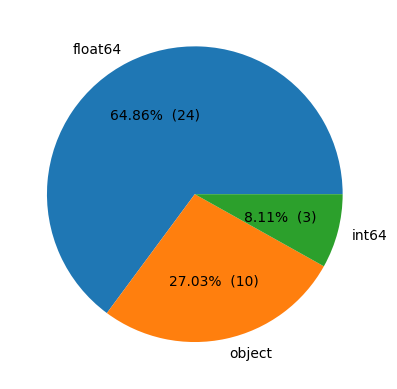


DATA QUICK DESCRIPTION


tags     count  unique  \
customer_city                       107927.0    4023   
customer_latitude                   107927.0    7608   
customer_longitude                  107927.0    7808   
customer_state                   📦  107927.0      27   
customer_unique_id                  107927.0   91043   
customer_zip_code_prefix            107927.0   14668   
freight_value                       107927.0    6870   
order_delivered_customer_date       107927.0   93249   
order_gross_sales                   107927.0   27166   
order_id                            107927.0   94027   
order_item_id                       107927.0      21   
order_purchase_timestamp            107927.0   93536   
paid_cash                           107927.0       2   
paid_credit_card                    107927.0    2101   
paid_debit_card                     107927.0       2   
paid_voucher                        107927.0    2101   
payment_installments                107927.0      23   
payment_sequential                  107927.0      19   
price                               107927.0    5757   
product_category_name               107927.0      71   
product_description_lenght          107927.0    2942   
product_height_cm                   107927.0     102   
product_id                          107927.0   31385   
product_length_cm                   107927.0      99   
product_name_lenght                 107927.0      65   
product_photos_qty                  107927.0      19   
product_weight_g                    107927.0    2166   
product_width_cm                    107927.0      94   
review_creation_date                107927.0     626   
review_id                           107927.0   93852   
review_score                        107927.0       5   
seller_city                         107927.0     585   
seller_id                           107927.0    2902   
seller_latitude                     107927.0    1424   
seller_longitude                    107927.0    1538   
seller_state                     📦  107927.0      22   
seller_zip_code_prefix              107927.0    2126   

                                                            top   freq  \
customer_city                                         sao paulo  17074   
customer_latitude                                             -      -   
customer_longitude                                            -      -   
customer_state                                               SP  45689   
customer_unique_id             c8460e4251689ba205045f3ea17884a1     24   
customer_zip_code_prefix                                      -      -   
freight_value                                                 -      -   
order_delivered_customer_date                                 -      -   
order_gross_sales                                             -      -   
order_id                       5a3b1c29a49756e75f1ef513383c0c12     22   
order_item_id                                                 -      -   
order_purchase_timestamp                                      -      -   
paid_cash                                                     -      -   
paid_credit_card                                              -      -   
paid_debit_card                                               -      -   
paid_voucher                                                  -      -   
payment_installments                                          -      -   
payment_sequential                                            -      -   
price                                                         -      -   
product_category_name                            bed_bath_table  10958   
product_description_lenght                                    -      -   
product_height_cm                                             -      -   
product_id                     aca2eb7d00ea1a7b8ebd4e68314663af    515   
product_length_cm                                             -      -   
product_name_lenght                                

In [55]:
z = data_overview(data_raw)

## <a id='toc4_1_'></a>[Constat](#toc0_)

Ces 2 années de données sont très complètes et permettent une segmentation marketing.  
Après agrégation et un rapide nettoyage, on constate :
- qu'il reste **beaucoup de variables** : il est nécessaire de **filtrer et regrouper** ces données autant que possible pour les étudier en détails
- la nécessité d'un feature engineering, par exemple :
  - **regrouper les catégories de produit en rayons plus grands** (71 catégories actuellement, trop pour permettre une classification)
  - **regrouper `product_length_cm`, `product_width_cm`, `product_height_cm`** en une même variable `product_volume`
- que malgré le nombre de variables, certaines **informations précieuses pour la segmentation sont à construire**, telles que :
  - CA et nombre de commandes par client
  - nombre de jours séparant 2 commandes pour un même client
  - tendances à acheter près de chez soi
  - saisonnalité et géographie du CA

# <a id='toc5_'></a>[Nettoyage et Feature Engineering](#toc0_)

Le but de ces manipulations est d'obtenir un jeu de données permettant une segmentation optimale de la clientèle : elles ont donc toutes un but d'analyse des ventes en prenant le client comme centre.

Pour ne pas confondre les données brutes avec celles modifiées par les manipulations à venir, le jeu de données est copié avec un nouveau nom :

In [56]:
df = data_raw.copy()

## <a id='toc5_1_'></a>[Catégories de produits : nettoyage](#toc0_)

Regroupement manuel en 5 catégories :
- fashion_beauty
- food_kitchen
- leisure
- house
- pro_it

In [57]:
former_categs = sorted(df["product_category_name"].unique())
print(former_categs)

['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2', 'home_comfort_2', 'home_confort', 'home_construction', 'housewares', 'indust

In [58]:
fashion_beauty = [
    'fashio_female_clothing',
    'fashion_bags_accessories',
    'fashion_childrens_clothes',
    'fashion_male_clothing',
    'fashion_shoes',
    'fashion_sport',
    'fashion_underwear_beach',
    'health_beauty',
    'perfumery',
    'watches_gifts',
]

food_kitchen = [
    'agro_industry_and_commerce',
    'drinks',
    'food',
    'food_drink',
    'kitchen_dining_laundry_garden_furniture',
    'la_cuisine',
    'small_appliances_home_oven_and_coffee',
    ]
    
leisure = [
    'art',
    'arts_and_craftmanship',
    'audio',
    'books_general_interest',
    'books_imported',
    'cds_dvds_musicals',
    'cine_photo',
    'consoles_games',
    'dvds_blu_ray',
    'music',
    'musical_instruments',
    'sports_leisure',
]

house = [
    'air_conditioning',
    'auto',
    'baby',
    'bed_bath_table',
    'christmas_supplies',
    'cool_stuff',
    'costruction_tools_garden',
    'diapers_and_hygiene',
    'flowers',
    'furniture_bedroom',
    'furniture_decor',
    'furniture_living_room',
    'furniture_mattress_and_upholstery',
    'garden_tools',
    'home_appliances',
    'home_appliances_2',
    'home_comfort_2',
    'home_confort',
    'home_construction',
    'housewares',
    'luggage_accessories',
    'party_supplies',
    'pet_shop',
    'small_appliances',
    'toys',
]

pro_it = [
    'books_technical',
    'computers',
    'computers_accessories',
    'construction_tools_construction',
    'construction_tools_lights',
    'construction_tools_safety',
    'costruction_tools_tools',
    'electronics',
    'fixed_telephony',
    'industry_commerce_and_business',
    'market_place',
    'office_furniture',
    'security_and_services',
    'signaling_and_security',
    'stationery',
    'tablets_printing_image',
    'telephony',
]

In [59]:
new_categs = []
for c in former_categs:
    new_categs.append(super_categ(c))
print(new_categs)

['food_kitchen', 'house', 'leisure', 'leisure', 'leisure', 'house', 'house', 'house', 'leisure', 'leisure', 'pro_it', 'leisure', 'house', 'leisure', 'pro_it', 'pro_it', 'leisure', 'pro_it', 'pro_it', 'pro_it', 'house', 'house', 'pro_it', 'house', 'food_kitchen', 'leisure', 'pro_it', 'fashion_beauty', 'fashion_beauty', 'fashion_beauty', 'fashion_beauty', 'fashion_beauty', 'fashion_beauty', 'fashion_beauty', 'pro_it', 'house', 'food_kitchen', 'food_kitchen', 'house', 'house', 'house', 'house', 'house', 'fashion_beauty', 'house', 'house', 'house', 'house', 'house', 'house', 'pro_it', 'food_kitchen', 'food_kitchen', 'house', 'pro_it', 'leisure', 'leisure', 'pro_it', 'house', 'fashion_beauty', 'house', 'pro_it', 'pro_it', 'house', 'food_kitchen', 'leisure', 'pro_it', 'pro_it', 'pro_it', 'house', 'fashion_beauty']


In [60]:
df["product_category_name"].replace(former_categs, new_categs, inplace=True)
print(df["product_category_name"].unique())

['house' 'fashion_beauty' 'pro_it' 'leisure' 'food_kitchen']


Répartition du CA par catégorie :

In [61]:
fig = px.pie(df, values='order_gross_sales', names='product_category_name',
    width=600, height=500, title="Gross sales per category")
fig.update_traces(textinfo="label+value+percent")
fig.update_layout(margin={"r":20,"t":40,"l":20,"b":20})
fig.show()

## <a id='toc5_2_'></a>[Volume d'un produit](#toc0_)

Ne sachant pas encore si la volumétrie d'un produit a une influence sur les comportements des clients et dans un but de diminution du nombre de colonnes non indispensables dans notre tableau, il est possible de **regrouper `product_length_cm`, `product_width_cm`, `product_height_cm`** en une même variable `product_volume` :

In [62]:
# create volume feature
df["product_volume_l"] = (df["product_length_cm"]
    * df["product_width_cm"]
    * df["product_height_cm"]
    / 1000 # volume in liters
    )

# delete size columns
df.drop(columns=[
    "product_length_cm",
    "product_width_cm",
    "product_height_cm",
    ], inplace=True)

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

## <a id='toc5_3_'></a>[CA et commandes](#toc0_)

Parmi les données les plus importantes concernant le CA et les commandes et que les données permettent de déterminer, il y a :
- le CA par client
- le nombre de commande(s) par client
- le CA moyen par commande

In [63]:
# create gross sales per customer, first step
_ = df.groupby(["customer_unique_id", "order_id"], as_index=False)\
    .agg(order_gross_sales=("order_gross_sales", "first"))

# sum and add the number of orders per customer
_ = _.groupby("customer_unique_id", as_index=False)\
    .agg(
        customer_gross_sales=("order_gross_sales", "sum"),
        customer_orders=("order_id", "count"),
        )

# add average basket
_["customer_basket_avg"] = round(
    _["customer_gross_sales"] / _["customer_orders"], 2)

# merge data
df = merge_df(df, _, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 35) + (91043, 4)
= (107927, 38)
Merge ok


## <a id='toc5_4_'></a>[Articles et clients](#toc0_)

Puisqu'il s'agit d'établir une segmentation de la clientèle, il est nécessaire de centrer les données sur les clients.  

Concernant les articles, on peut déterminer plusieurs variables intéressantes pour chaque client :
- les catégories d'articles favorites
- le nombre d'articles achetés
- le nombre moyen d'articles par commande
- le prix moyen d'un article
- le volume moyen d'un article
- le poids moyen d'un article

Et pour vérifier une éventuelle influence marketing (toujours par client) :
- la longueur moyenne de la description des articles achetés
- la longueur moyenne du nom des articles achetés
- le nombre de photos moyen des articles achetés

In [64]:
# get items data from whole DF and group by customer and product
items_df = df.groupby(
    ["customer_unique_id", "order_id", "product_id", "order_item_id"],
        as_index=False)\
    .agg(
        customer_orders=("customer_orders", "first"),
        order_item_id=("order_item_id", "first"),
        product_category_name=("product_category_name", "first"),
        product_price=("price", "first"),
        product_volume_l=("product_volume_l", "first"),
        product_weight_g=("product_weight_g", "first"),
        product_description_lenght=("product_description_lenght", "first"),
        product_name_lenght=("product_name_lenght", "first"),
        product_photos_qty=("product_photos_qty", "first"),
        )

### Catégories d'articles

In [65]:
# create category frequency dataframe
cat_freq_df = items_df\
    .groupby("customer_unique_id")["product_category_name"]\
    .value_counts(normalize=True)\
    .reset_index(name="category_frequency")

In [66]:
# create categories frequencies features in customer DF
categories = cat_freq_df["product_category_name"].unique()

for c in categories:
    feature_name = "categ_freq_" + c
    _ = cat_freq_df.loc[cat_freq_df["product_category_name"] == c]
    cat_freq_df[feature_name] = _["category_frequency"]

# clean
cat_freq_df.fillna(0, inplace=True)
cat_freq_df.drop(columns=["product_category_name", "category_frequency"],
    inplace=True)

# group items category frequency for further merge
cat_freq_df = cat_freq_df.groupby("customer_unique_id", as_index=False)\
    .agg(
        categ_freq_fashion_beauty=("categ_freq_fashion_beauty", "max"),
        categ_freq_food_kitchen=("categ_freq_food_kitchen", "max"),
        categ_freq_house=("categ_freq_house", "max"),
        categ_freq_leisure=("categ_freq_leisure", "max"),
        categ_freq_pro_it=("categ_freq_pro_it", "max"),
        )

# merge data
df = merge_df(df, cat_freq_df, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 38) + (91043, 6)
= (107927, 43)
Merge ok


In [67]:
describe_df(df[["categ_freq_fashion_beauty", "categ_freq_food_kitchen",
    "categ_freq_house", "categ_freq_leisure", "categ_freq_pro_it"]])

tags     count      mean       std  min  25%  50%  \
categ_freq_fashion_beauty       107927.0  0.195762  0.392854  0.0  0.0  0.0   
categ_freq_food_kitchen         107927.0  0.015719  0.122427  0.0  0.0  0.0   
categ_freq_house                107927.0  0.480205  0.494554  0.0  0.0  0.0   
categ_freq_leisure              107927.0  0.106445  0.305012  0.0  0.0  0.0   
categ_freq_pro_it               107927.0  0.201869  0.397423  0.0  0.0  0.0   

                           75%  max  unique     type  nan  nan_pct  
categ_freq_fashion_beauty  0.0  1.0      19  float64    0      0.0  
categ_freq_food_kitchen    0.0  1.0      13  float64    0      0.0  
categ_freq_house           1.0  1.0      22  float64    0      0.0  
categ_freq_leisure         0.0  1.0      14  float64    0      0.0  
categ_freq_pro_it          0.0  1.0      21  float64    0      0.0

### Nombre d'articles achetés

In [68]:
# create number of items dataframe
nb_items_df = items_df.groupby("customer_unique_id", as_index=False)\
    .size()\
    .rename(columns={"size": "customer_items_tot"})

# merge data
df = merge_df(df, nb_items_df, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 43) + (91043, 2)
= (107927, 44)
Merge ok


In [69]:
describe_df(df[["customer_items_tot"]])

tags     count   mean       std  min  25%  50%  75%   max  \
customer_items_tot       107927.0  1.507  1.317971  1.0  1.0  1.0  2.0  24.0   

                    unique   type  nan  nan_pct  
customer_items_tot      19  int64    0      0.0

### Nombre moyen d'articles par commande

In [70]:
df["customer_items_avg"] = df["customer_items_tot"] / df["customer_orders"]
df = df.reindex(sorted(df.columns), axis=1)

In [71]:
describe_df(df[["customer_items_avg"]])

tags     count      mean       std  min  25%  50%  75%  \
customer_items_avg       107927.0  1.381982  1.062282  1.0  1.0  1.0  1.0   

                     max  unique     type  nan  nan_pct  
customer_items_avg  21.0      40  float64    0      0.0

### Autres informations concernant les articles

In [72]:
# group items information by customer
items_df = items_df.groupby("customer_unique_id", as_index=False)\
    .agg(
        items_price_avg=("product_price", "mean"),
        items_volume_avg=("product_volume_l", "mean"),
        items_weight_avg=("product_weight_g", "mean"),
        items_descr_len_avg=("product_description_lenght", "mean"),
        items_name_len_avg=("product_name_lenght", "mean"),
        items_photos_avg=("product_photos_qty", "mean"),
        )

# merge data
df = merge_df(df, items_df, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 45) + (91043, 7)
= (107927, 51)
Merge ok


In [73]:
describe_df(df[["items_price_avg", "items_volume_avg", "items_weight_avg",
    "items_descr_len_avg", "items_name_len_avg", "items_photos_avg"]])

tags     count         mean          std    min       25%  \
items_descr_len_avg       107927.0   786.361624   642.173876  4.000  352.0000   
items_name_len_avg        107927.0    48.799850     9.799323  5.000   43.0000   
items_photos_avg          107927.0     2.202955     1.684875  1.000    1.0000   
items_price_avg           107927.0   119.820165   179.054656  0.850   40.0000   
items_volume_avg          107927.0    15.218084    22.842515  0.168    2.9035   
items_weight_avg          107927.0  2090.480676  3672.264589  0.000  300.0000   

                        50%          75%        max  unique     type  nan  \
items_descr_len_avg  603.00   982.533333   3992.000    4579  float64    0   
items_name_len_avg    51.25    57.000000     76.000     339  float64    0   
items_photos_avg       1.50     3.000000     20.000     101  float64    0   
items_price_avg       75.00   133.000000   6735.000    7896  float64    0   
items_volume_avg       6.82    18.400000    296.208    7336  float64    0   
items_weight_avg     700.00  1825.000000  40425.000    3176  float64    0   

                     nan_pct  
items_descr_len_avg      0.0  
items_name_len_avg       0.0  
items_photos_avg         0.0  
items_price_avg          0.0  
items_volume_avg         0.0  
items_weight_avg         0.0

## <a id='toc5_5_'></a>[Paiement](#toc0_)

Il peut être intéressant de connaître le **type de paiement préférentiel** d'un client pour la segmentation, ainsi que sa **tendance à effectuer ses achats en une ou plusieurs fois**.  

Les différents types de paiement utilisés devront être rapporté au CA par commande, puis additionnés pour définir un pro rata global par client.  

Pour rappel, `payment_installments` correspond au nombre d'échelons de paiement et `payment_sequential` au nombre de moyens de paiement différents utilisés pour régler une commande.  
Ces variables n'étant pas relatives au CA, il sera possible d'utiliser directement leur moyenne.

In [74]:
# create data per order, first step
_ = df.groupby(["customer_unique_id", "order_id"], as_index=False)\
    .agg(
        order_gross_sales=("order_gross_sales", "first"),
        paid_cash=("paid_cash", "first"),
        paid_credit_card=("paid_credit_card", "first"),
        paid_debit_card=("paid_debit_card", "first"),
        paid_voucher=("paid_voucher", "first"),
        payment_installments=("payment_installments", "first"),
        payment_sequential=("payment_sequential", "first"),
        )

# set payment types from order GS ratio to amount paid
_["paid_cash"] = _["paid_cash"] * _["order_gross_sales"]
_["paid_credit_card"] = _["paid_credit_card"] * _["order_gross_sales"]
_["paid_debit_card"] = _["paid_debit_card"] * _["order_gross_sales"]
_["paid_voucher"] = _["paid_voucher"] * _["order_gross_sales"]

# group by customer
_ = _.groupby("customer_unique_id", as_index=False)\
    .agg(
        order_gross_sales=("order_gross_sales", "sum"),
        paid_cash=("paid_cash", "sum"),
        paid_credit_card=("paid_credit_card", "sum"),
        paid_debit_card=("paid_debit_card", "sum"),
        paid_voucher=("paid_voucher", "sum"),
        customer_pay_installments=("payment_installments", "mean"),
        customer_pay_sequential=("payment_sequential", "mean"),
        )

# set back payment types to GS ratio
_["customer_pay_cash"] = _["paid_cash"] / _["order_gross_sales"]
_["customer_pay_credit_card"] = _["paid_credit_card"] / _["order_gross_sales"]
_["customer_pay_debit_card"] = _["paid_debit_card"] / _["order_gross_sales"]
_["customer_pay_voucher"] = _["paid_voucher"] / _["order_gross_sales"]

# drop useless features
_.drop(columns=["order_gross_sales", "paid_cash", "paid_credit_card",
    "paid_debit_card", "paid_voucher"], inplace=True)

# merge data
df = merge_df(df, _, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 51) + (91043, 7)
= (107927, 57)
Merge ok


In [75]:
describe_df(df[["customer_pay_cash", "customer_pay_credit_card",
    "customer_pay_debit_card", "customer_pay_voucher",
    "customer_pay_installments", "customer_pay_sequential"]])

tags     count      mean       std  min       25%  \
customer_pay_cash               107927.0  0.203102  0.400802  0.0  0.000000   
customer_pay_credit_card        107927.0  0.753127  0.425680  0.0  0.578458   
customer_pay_debit_card         107927.0  0.015012  0.120722  0.0  0.000000   
customer_pay_installments       107927.0  3.016219  2.778708  1.0  1.000000   
customer_pay_sequential         107927.0  1.044589  0.371681  1.0  1.000000   
customer_pay_voucher            107927.0  0.028759  0.155330  0.0  0.000000   

                           50%  75%   max  unique     type  nan  nan_pct  
customer_pay_cash          0.0  0.0   1.0     223  float64    0      0.0  
customer_pay_credit_card   1.0  1.0   1.0    2287  float64    0      0.0  
customer_pay_debit_card    0.0  0.0   1.0      46  float64    0      0.0  
customer_pay_installments  2.0  4.0  24.0      67  float64    0      0.0  
customer_pay_sequential    1.0  1.0  26.0      31  float64    0      0.0  
customer_pay_voucher       0.0  0.0   1.0    2114  float64    0      0.0

## <a id='toc5_6_'></a>[Délais de commande](#toc0_)

Pour chaque client, ces mesures portent sur :
- le nombre de jours depuis la dernière commande
- la durée moyenne (jours) entre deux commandes

Tout d'abord, il s'agit de fixer une **date de dernière commande**, considérée comme le moment de **gel des données**.  
Des commandes peuvent toutefois être livrées et des commentaires effectués après cette date.

In [76]:
data_raw[data_raw.filter(regex='date|time').columns].max().apply(ts_to_dt)

order_delivered_customer_date    2018-10-17 13:22:46
order_purchase_timestamp         2018-08-29 15:00:37
review_creation_date             2018-08-31 00:00:00
dtype: object

In [77]:
end_date = df["order_purchase_timestamp"].max()
print(f"Last order: {ts_to_dt(end_date)} ({end_date})")

Last order: 2018-08-29 15:00:37 (1535554837.0)


Puis pour chaque client, on visualise le **nombre de jours depuis la dernière commande** :

In [78]:
# set days since last order for all orders
df["temp_dslo"] = (end_date - df["order_purchase_timestamp"])\
    .apply(lambda x: timedelta(seconds=x).days)

# group by customer and keep only smallest value per customer
_ = df.groupby(["customer_unique_id"], as_index=False)\
    .agg(customer_days_last_order=("temp_dslo", "min"))

# merge data
df.drop(columns="temp_dslo", inplace=True)
df = merge_df(df, _, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 57) + (91043, 2)
= (107927, 58)
Merge ok


In [79]:
describe_df(df[["customer_days_last_order"]])

tags     count        mean         std  min    25%  \
customer_days_last_order       107927.0  235.472838  152.230457  0.0  112.0   

                            50%    75%    max  unique   type  nan  nan_pct  
customer_days_last_order  216.0  343.0  694.0     610  int64    0      0.0

Ainsi que le **temps de livraison moyen** :

In [80]:
# set delivery time for all orders
df["order_delivery_time"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
    ).apply(lambda x: timedelta(seconds=x).days)

# group by order first
_ = df.groupby(["customer_unique_id", "order_id"], as_index=False)\
    .agg(order_delivery_time=("order_delivery_time", "first"))

# then group again by customer
_ = _.groupby(["customer_unique_id"], as_index=False)\
    .agg(customer_delivery_time_avg=("order_delivery_time", "mean"))
_["customer_delivery_time_avg"] = round(_["customer_delivery_time_avg"], 1)

# merge data
df = merge_df(df, _, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 59) + (91043, 2)
= (107927, 60)
Merge ok


In [81]:
describe_df(df[["order_delivery_time", "customer_delivery_time_avg"]])

tags     count       mean       std  min  25%  \
customer_delivery_time_avg       107927.0  11.961051  9.270970  0.0  6.0   
order_delivery_time              107927.0  11.955609  9.345739  0.0  6.0   

                             50%   75%    max  unique     type  nan  nan_pct  
customer_delivery_time_avg  10.0  15.0  208.0     239  float64    0      0.0  
order_delivery_time         10.0  15.0  208.0     143    int64    0      0.0

Et enfin le **nombre de jours moyen entre deux commandes** :

In [82]:
# get only customers with multiple orders
_ = df.loc[df["customer_orders"] > 1]

# group by order_id
_ = _.groupby(["customer_unique_id", "order_id"], as_index=False)\
    .agg(ts=("order_purchase_timestamp", "first"))

# for checking data
_["order_date"] = _["ts"].apply(ts_to_dt)
_["delays"] = 0

# set genuine column and fill it
_["customer_orders_delay"] = 0
for c in _["customer_unique_id"].unique():
    ts = sorted(_.loc[_["customer_unique_id"] == c, "ts"])
    delays = []
    for i,e in enumerate(ts[:-1]):
        delay = timedelta(seconds=(ts[i+1] - ts[i])).days
        # remove too close orders (< 1 day)
        if delay > 0: delays.append(delay)

    # manage empty lists
    mean_delta = round(np.mean(delays), 0) if len(delays) > 0 else 0
        
    _.loc[_["customer_unique_id"] == c, "customer_orders_delay"] = mean_delta

# drop useless features before merge
_.drop(columns=["order_id", "ts", "order_date", "delays"], inplace=True)
_ = _.groupby(["customer_unique_id"], as_index=False)\
    .agg(customer_orders_delay=("customer_orders_delay", "first"))

# merge
df = merge_df(df, _, "customer_unique_id")
df.fillna(0, inplace=True)

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 60) + (2687, 2)
= (107927, 61)
Merge ok


## <a id='toc5_7_'></a>[Distances client ↔ vendeur](#toc0_)

Cette donnée pourrait permettre de visualiser des clients qui ont une tendance à acheter près de chez eux.

Pour ce faire, il est d'abord nécessaire de connaître la distance client-vendeur de chaque commande :

In [83]:
df["order_distance"] = df.apply(lambda x: distance_gps(
    x["customer_latitude"], x["customer_longitude"],
    x["seller_latitude"], x["seller_longitude"],
    ), axis=1)

df = df.reindex(sorted(df.columns), axis=1)

describe_df(df[["order_distance"]])

tags     count        mean         std  min     25%      50%  \
order_distance       107927.0  594.924134  585.912692  0.0  186.58  431.927   

                     75%       max  unique     type  nan  nan_pct  
order_distance  789.8185  8652.095   85499  float64    0      0.0

Plusieurs anomalies peuvent être rapidement repérées et corrigées, comme en filtrant les villes dont la distance est supérieure à 3400 kms.  
Pour chaque ville concernée, le point GPS est replacé, en milieu de zone urbaine.

Cependant, le Brésil étant très vaste, les distances de livraison ont une grande variabilité et peuvent dépasser les 3000 kms.

In [84]:
dist_outliers = df.loc[df["order_distance"] > 3400,
    ["order_distance", "customer_city"]]
display(dist_outliers)

order_distance           customer_city
11533        3454.160        vila dos cabanos
32767        5316.997         porto trombetas
33473        3918.404  santo antonio do canaa
48061        3491.849        vila dos cabanos
57813        4775.321                ibiajara
57892        3526.574        vila dos cabanos
58377        8652.095      ilha dos valadares
72713        5316.997         porto trombetas

In [85]:
cities_relocated = sorted(dist_outliers["customer_city"].unique())

df.loc[df["customer_city"] == "ibiajara",
    ["customer_latitude", "customer_longitude"]] = -12.987, -42.22

df.loc[df["customer_city"] == "ilha dos valadares",
    ["customer_latitude", "customer_longitude"]] = -25.524, -48.526

df.loc[df["customer_city"] == "porto trombetas",
    ["customer_latitude", "customer_longitude"]] = -1.467, -56.377

df.loc[df["customer_city"] == "santo antonio do canaa",
    ["customer_latitude", "customer_longitude"]] = -19.825, -40.656
    
df.loc[df["customer_city"] == "vila dos cabanos",
    ["customer_latitude", "customer_longitude"]] = -1.539, -48.676

In [86]:
df["order_distance"] = df.apply(lambda x: distance_gps(
    x["customer_latitude"], x["customer_longitude"],
    x["seller_latitude"], x["seller_longitude"],
    ) if x["customer_city"] in cities_relocated else x["order_distance"]
    , axis=1)

In [87]:
describe_df(df[["order_distance"]])

tags     count        mean         std  min       25%      50%  \
order_distance       107927.0  594.693438  584.756463  0.0  186.4815  431.892   

                     75%       max  unique     type  nan  nan_pct  
order_distance  789.7865  3385.027   85499  float64    0      0.0

Ces corrections ne concernent que les clients, les villes des vendeurs sont moins diverses et a priori mieux renseignées concernant leur géolocalisation.

Il est désormais possible de renseigner la distance moyenne de commande par client :

In [88]:
# group by order first (avoid duplicates)
_ = df.groupby(["customer_unique_id", "order_id"], as_index=False)\
    .agg(order_distance=("order_distance", "first"))

# group again by customer
_ = _.groupby(["customer_unique_id"], as_index=False)\
    .agg(customer_seller_dist_avg=("order_distance", "mean"))

# merge data
df = merge_df(df, _, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 62) + (91043, 2)
= (107927, 63)
Merge ok


In [89]:
describe_df(df[["customer_seller_dist_avg"]])

tags     count        mean         std  min      25%  \
customer_seller_dist_avg       107927.0  594.625589  583.209871  0.0  191.062   

                              50%      75%       max  unique     type  nan  \
customer_seller_dist_avg  432.281  787.477  3385.027   83089  float64    0   

                          nan_pct  
customer_seller_dist_avg      0.0

## <a id='toc5_8_'></a>[Frais de port](#toc0_)

Deux variables peuvent être pertinentes pour les frais de port :
- le montant moyen des **frais de port par commande**
- la **part des frais de port** dans le chiffre d'affaires d'un client

Il serait possible de détecter les clients sensibles aux frais de port, que ce soit de manière globale ou par rapport au montant de leur commande.

In [90]:
# group by order for freight focused data
_ = df.groupby(["customer_unique_id", "order_id"], as_index=False)\
    .agg(
        orders=("customer_orders", "first"),
        gross_sales=("customer_gross_sales", "first"),
        freight_value=("freight_value", "first"),
        )

# group again by customer to sum freight costs
_ = _.groupby(["customer_unique_id"], as_index=False)\
    .agg(
        orders=("orders", "first"),
        gross_sales=("gross_sales", "first"),
        freight_sum=("freight_value", "sum"),
        )

# create new features
_["customer_freight_avg"] = round(
    _["freight_sum"] / _["orders"], 2)

_["customer_freight_by_gs"] = round(
    _["freight_sum"] / (_["gross_sales"] - _["freight_sum"]), 2)

# delete features that became useless
_.drop(columns=["freight_sum", "orders", "gross_sales"], inplace=True)
df.drop(columns=["freight_value"], inplace=True)

# merge data
df = merge_df(df, _, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 62) + (91043, 3)
= (107927, 64)
Merge ok


## <a id='toc5_9_'></a>[Commentaires](#toc0_)

Il est possible d'évaluer la satisfaction client à partir de 2 critères :
- le **nombre de commentaires** produits laissés par client
- la **note moyenne** des commentaires d'un client

Une analyse plus approfondie des commentaires (LLM, par exemple) serait très intéressante mais ne fait pas l'objet de cette étude.

In [91]:
# create reviews focused data
_ = df.groupby(["customer_unique_id"], as_index=False)\
    .agg(
        customer_reviews_mean_score=("review_score", "mean"),
        customer_reviews=("review_id", pd.Series.nunique),
        )

# delete features that became useless
df.drop(columns=["review_creation_date", "review_id", "review_score"], inplace=True)

# merge data
df = merge_df(df, _, "customer_unique_id")

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 61) + (91043, 3)
= (107927, 63)
Merge ok


## <a id='toc5_10_'></a>[Saisonnalité](#toc0_)

La variable `customer_orders_delay` renseigne sur le nombre de jours moyen entre 2 commandes pour un même client.

Il serait intéressant de **vérifier la saisonnalité** des commandes, déjà à échelle de toute la plateforme pour un meilleur ciblage des actions marketing (fêtes de fin d'année, carnaval, etc.), mais aussi des clients.

En effet, des groupes de clients peuvent se distinguer en fonction de plusieurs critères temporels :
- semaine de l'année
- jour de la semaine
- heure de la journée

Pour ce faire, il est d'abord nécessaire de convertir les horodatages des commandes en numéro de semaine / jour de la semaine, heure de la journée (arrondie).

Ne sachant pas comment elles ont été horodatées, les heures de commandes ne seront pas converties et il sera assumé que l'horodatage correspond au serveur Olist, dans son siège à Curitiba (UTC -3).

In [ ]:
df["order_date"] = df["order_purchase_timestamp"].apply(ts_to_dt)
df["order_week"] = df["order_purchase_timestamp"].apply(
    lambda x: pd.Timestamp(x, unit='s').week)
df["order_day_of_week"] = df["order_purchase_timestamp"].apply(
    lambda x: pd.Timestamp(x, unit='s').dayofweek)
df["order_hour"] = df["order_purchase_timestamp"].apply(
    lambda x: pd.Timestamp(x, unit='s').round(freq="H").hour)

# sort columns
df = df.reindex(sorted(df.columns), axis=1)

### Variabilité annuelle (semaines)

In [ ]:
df_orders_season = df.groupby(["order_id"], as_index=False)\
    .agg(
        date=("order_date", "first"),
        w=("order_week", "first"),
        dow=("order_day_of_week", "first"),
        h=("order_hour", "first"),
        gs=("order_gross_sales", "first"),
        cust_id=("customer_unique_id", "first"),
        nb_orders=("customer_orders", "first"),
        )

In [ ]:
gs_by_week = df_orders_season.groupby(["w"], as_index=False)\
    .agg(gs=("gs", "sum"))

In [ ]:
fig = make_subplots(rows=2, cols=1)
# orders by week
fig.add_trace(go.Histogram(x=df_orders_season["w"]), row=1, col=1)
# GS by week
fig.add_trace(go.Bar(x=gs_by_week["w"], y=gs_by_week["gs"]), row=2, col=1)
# display adjustments
fig.update_layout(title="Orders and GS per week ", showlegend=False,
    width=600, height=600, margin=dict(l=20, r=20, t=50, b=20))
fig.update_traces(textposition="outside", cliponaxis=False)
fig.show()

### Variabilité hebdomadaire (jours)

In [ ]:
gs_by_dayofweek = df_orders_season.groupby(["dow"], as_index=False)\
    .agg(gs=("gs", "sum"))

In [ ]:
gs_by_dayofweek.index = ["monday", "tuesday", "wednesday", "thursday",
    "friday", "saturday", "sunday"]

In [ ]:
fig = make_subplots(rows=2, cols=1)
# orders by day of week
fig.add_trace(go.Histogram(x=df_orders_season["dow"]), row=1, col=1)
# GS by day of week
fig.add_trace(go.Bar(x=gs_by_dayofweek.index, y=gs_by_dayofweek["gs"]), row=2, col=1)
# display adjustments
fig.update_layout(title="Orders and GS per day of week ", showlegend=False,
    width=600, height=600, margin=dict(l=20, r=20, t=50, b=20))
fig.update_traces(textposition="outside", cliponaxis=False)
# display x-axis values for last axis only
for r in range(2):
    fig.update_xaxes(title_text='', tickvals=[], row=r, col=1)
fig.show()

### Variabilité journalière (horaires)

In [ ]:
gs_by_hour = df_orders_season.groupby(["h"], as_index=False)\
    .agg(gs=("gs", "sum"))

In [ ]:
fig = make_subplots(rows=2, cols=1)
# orders by hour
fig.add_trace(go.Histogram(x=df_orders_season["h"]), row=1, col=1)
# GS by hour
fig.add_trace(go.Bar(x=gs_by_hour["h"], y=gs_by_hour["gs"]), row=2, col=1)
# display adjustments
fig.update_layout(title="Orders and GS per hour of day ", showlegend=False,
    width=600, height=600, margin=dict(l=20, r=20, t=50, b=20))
fig.update_traces(textposition="outside", cliponaxis=False)
# display x-axis values for last axis only
for r in range(2):
    fig.update_xaxes(title_text='', tickvals=[], row=r, col=1)
fig.show()

### Constat

Il y a bien une saisonnalité dans les commandes, aux trois échelles mesurées :
- annuellement, avec des creux marqués durant les vacances d'été et plus encore durant les hausses d'activité scolaire et professionnelle (fin août à mi-novembre) et des pics marqués par une violente reprise semaine 47 (fin novembre, préparant Noël et les vacances d'été) et les mois de mai + mi-juillet à mi-août
- hebdomadairement, les commandes sont plus nombreuses en début de semaine et décroissent doucement jusqu'au week-end où elles sont encore plus basses
- les horaires montrent une activité stable entre 9h30 et 22h30 et réduite à fortement réduite hors de ce créneau

### Fusion avec le données principal

Ces informations de saisonnalité permettent d'améliorer les actions marketing mais posent un problème pour la segmentation des clients.

En effet, afin de départager les clients ayand commandé plusieurs fois à des semaines, jours et heures différents mais à fréquences équivalentes (série multimodale), il est nécessaire de pondérer chaque valeur pour faire un choix unique gérable par le modèle.

Sachant que le marqueur principal d'Olist est le chiffre d'affaires, ce pourrait a priori être un poids judicieux, bien qu'il amène aussi un biais en favorisant les clients d'Olist (magasins) les plus générateurs de CA (high-tech ou ameublement, par exemple).

In [ ]:
# group by customer ID
df_cust_season = df_orders_season.groupby(["cust_id"], as_index=False).agg(
    w_mode=("w", pd.Series.mode),
    dow_mode=("dow", pd.Series.mode),
    h_mode=("h", pd.Series.mode),
    nb_orders=("nb_orders", "first"),
    )

In [ ]:
# get relevant mode weightened on GS
multi_order_cust = df_cust_season.loc[df_cust_season["nb_orders"] > 1]\
    .apply(get_max_gs_mode, axis=1, result_type="expand")

# rename columns
multi_order_cust.columns = ["cust_id", "w_mode", "dow_mode", "h_mode"]

In [ ]:
# merge with customer DF, for multiple orders only
df_cust_season.loc[df_cust_season["nb_orders"] > 1,
    ["w_mode", "dow_mode", "h_mode"]] = \
        multi_order_cust[["w_mode", "dow_mode", "h_mode"]]

# drop useless column
df_cust_season.drop(columns="nb_orders", inplace=True)

# set data type (multiple, because of pd.series.mode)
df_cust_season[["w_mode", "dow_mode", "h_mode"]] = \
    df_cust_season[["w_mode", "dow_mode", "h_mode"]].apply(pd.to_numeric)

# rename columns
df_cust_season.rename(columns={
    "cust_id": "customer_unique_id",
    "w_mode": "customer_time_fav_week",
    "dow_mode": "customer_time_fav_dow",
    "h_mode": "customer_time_fav_hour",
    }, inplace=True)

# merge and sort features
df = merge_df(df, df_cust_season, "customer_unique_id")
df = df.reindex(sorted(df.columns), axis=1)

Checking shapes:
(107927, 67) + (91043, 4)
= (107927, 70)
Merge ok


In [ ]:
describe_df(df[["customer_time_fav_week", "customer_time_fav_dow",
    "customer_time_fav_hour"]])

tags     count       mean        std  min   25%   50%  \
customer_time_fav_dow        107927.0   2.746449   1.962065  0.0   1.0   3.0   
customer_time_fav_hour       107927.0  14.827559   5.570405  0.0  11.0  15.0   
customer_time_fav_week       107927.0  24.366896  14.015987  1.0  13.0  24.0   

                         75%   max  unique   type  nan  nan_pct  
customer_time_fav_dow    4.0   6.0       7  int64    0      0.0  
customer_time_fav_hour  19.0  23.0      24  int64    0      0.0  
customer_time_fav_week  34.0  52.0      52  int64    0      0.0

# <a id='toc6_'></a>[Jeu de données clients](#toc0_)

Pour poursuivre la démarche d'une segmentation efficace, il est nécessaire de créer un **jeu de données centré sur les clients et comprenant toutes les variables utiles vues précédemment**.

In [ ]:
useless_features = ["customer_city", "customer_latitude", "customer_longitude",
    "customer_state", "customer_zip_code_prefix"]
customer_features = [c for c in df.filter(regex='^(customer_)|(categ_freq_)')\
    .columns.tolist() if c not in useless_features]

cust_df = df[customer_features]

In [ ]:
cust_df = cust_df.groupby(["customer_unique_id"], as_index=False)\
    .agg(
        orders_count=("customer_orders", "first"),
        gross_sales=("customer_gross_sales", "first"),
        basket_avg=("customer_basket_avg", "first"),
        items_count=("customer_items_tot", "first"),
        items_avg=("customer_items_avg", "first"),
        categ_freq_fashion_beauty=("categ_freq_fashion_beauty", "first"),
        categ_freq_food_kitchen=("categ_freq_food_kitchen", "first"),
        categ_freq_house=("categ_freq_house", "first"),
        categ_freq_leisure=("categ_freq_leisure", "first"),
        categ_freq_pro_it=("categ_freq_pro_it", "first"),
        freight_avg=("customer_freight_avg", "first"),
        freight_by_gs=("customer_freight_by_gs", "first"),
        pay_type_cash=("customer_pay_cash", "first"),
        pay_type_credit_card=("customer_pay_credit_card", "first"),
        pay_type_debit_card=("customer_pay_debit_card", "first"),
        pay_installments=("customer_pay_installments", "first"),
        pay_sequential=("customer_pay_sequential", "first"),
        pay_type_voucher=("customer_pay_voucher", "first"),
        time_bw_orders_avg=("customer_orders_delay", "first"),
        time_delivery_avg=("customer_delivery_time_avg", "first"),
        time_since_last_order=("customer_days_last_order", "first"),
        time_fav_week=("customer_time_fav_week", "first"),
        time_fav_dow=("customer_time_fav_dow", "first"),
        time_fav_hour=("customer_time_fav_hour", "first"),
        reviews_count=("customer_reviews", "first"),
        reviews_mean_score=("customer_reviews_mean_score", "first"),
        seller_dist_avg=("customer_seller_dist_avg", "first"),
    )

# clean & sort columns
cust_df = cust_df.reindex(sorted(cust_df.columns), axis=1)

In [ ]:
describe_df(cust_df)

tags    count  unique  \
basket_avg                      91043.0   26554   
categ_freq_fashion_beauty       91043.0      19   
categ_freq_food_kitchen         91043.0      13   
categ_freq_house                91043.0      22   
categ_freq_leisure              91043.0      14   
categ_freq_pro_it               91043.0      21   
customer_unique_id           💎  91043.0   91043   
freight_avg                     91043.0    6554   
freight_by_gs                   91043.0     302   
gross_sales                     91043.0   27924   
items_avg                       91043.0      40   
items_count                     91043.0      19   
orders_count                    91043.0       9   
pay_installments                91043.0      67   
pay_sequential                  91043.0      31   
pay_type_cash                   91043.0     223   
pay_type_credit_card            91043.0    2287   
pay_type_debit_card             91043.0      46   
pay_type_voucher                91043.0    2114   
reviews_count                   91043.0       9   
reviews_mean_score              91043.0      56   
seller_dist_avg                 91043.0   83089   
time_bw_orders_avg              91043.0     396   
time_delivery_avg               91043.0     239   
time_fav_dow                    91043.0       7   
time_fav_hour                   91043.0      24   
time_fav_week                   91043.0      52   
time_since_last_order           91043.0     610   

                                                        top freq        mean  \
basket_avg                                                -    -  160.267308   
categ_freq_fashion_beauty                                 -    -    0.205412   
categ_freq_food_kitchen                                   -    -    0.015359   
categ_freq_house                                          -    -    0.467828   
categ_freq_leisure                                        -    -    0.109166   
categ_freq_pro_it                                         -    -    0.202235   
customer_unique_id         0000366f3b9a7992bf8c76cfdf3221e2    1           -   
freight_avg                                               -    -   20.220334   
freight_by_gs                                             -    -     0.28318   
gross_sales                                               -    -  165.059987   
items_avg                                                 -    -    1.138578   
items_count                                               -    -    1.178575   
orders_count                                              -    -    1.032776   
pay_installments                                          -    -    2.917097   
pay_sequential                                            -    -    1.044495   
pay_type_cash                                             -    -    0.199275   
pay_type_credit_card                                      -    -    0.755572   
pay_type_debit_card                                       -    -    0.015474   
pay_type_voucher                                          -    -    0.029678   
reviews_count                                             -    -    1.030854   
reviews_mean_score                                        -    -    4.154462   
seller_dist_avg                                           -    -  600.922905   
time_bw_orders_avg                                        -    -    2.413112   
time_delivery_avg                                         -    -   12.048915   
time_fav_dow                                              -    -    2.754808   
time_fav_hour                                             -    -   14.866645   
time_fav_week                                             -    -   24.374779   
time_since_last_order                                     -    -   236.09066   

                                  std   min       25%      50%      75%  \
basket_avg                  218.35072  9.59     62.34   105.37   176.97   
categ_freq_fashion_beauty    0.402188   0.0       0.0      0.0      0.0   


# <a id='toc7_'></a>[Segmentation marketing et stratégie](#toc0_)

João de l’équipe Marketing a présenté la [segmentation RFM](https://www.definitions-marketing.com/definition/segmentation-rfm/) qui avait été effectuée par mon prédécesseur. Cette segmentation par **récence, fréquence et montant** permet de segmenter la clientèle en fonction de ses habitudes pour adapter le ciblage et les actions marketing en découlant aux divers types de clients.

Imaginons deux clients à la fréquence relativement soutenue, au montant ou panier moyen assez haut : si l'un a commandé il y a seulement quelques jours, il n'est pas à considérer comme celui qui aurait commandé de la même manière il y a 2 mois. Ce serait par exemple trop tôt pour lui envoyer certains call-to-action et aurait un effet plutôt négatif.  

De même, un service marketing peut relativiser les coûts de fidélisation d'un client au panier moyen très faible avec une fréquence presque nulle car il y a de fortes chances que le retour sur investissement soit trop bas.

**Cette segmentation seule suffit rarement** mais tout d'abord : **est-elle applicable** concernant Olist et les données dont nous disposons quant à sa clientèle ?

## <a id='toc7_1_'></a>[Analyse RFM](#toc0_)

### Récence

Récence des commandes (jours depuis la dernière commande) :

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
# violin
fig.add_trace(go.Violin(x=cust_df["time_since_last_order"], box_visible=True,
    meanline_visible=True, line_color="black", fillcolor="lightseagreen",
    opacity=0.6), secondary_y=True)
# histogram
fig.add_trace(go.Histogram(x=cust_df["time_since_last_order"],
    xbins=dict(size=7), marker_color="#EB89B5", opacity=0.7))
fig.update_traces(name="")
fig.update_layout(title="Days since last order")
fig.show()

### Fréquence

Analyse de la fréquence (nombre de commandes clients sur les 2 ans de données) :

In [ ]:
df_ = pd.DataFrame()
df_["n_orders"] = cust_df["orders_count"]
df_["loyal"] = np.where(cust_df["orders_count"] > 1, "yes", "no")

fig = px.sunburst(df_, path=["loyal", "n_orders"], values="n_orders",
    title="Customer loyalty and orders count")
fig.update_traces(
    hoverinfo="label+value", textinfo="label+percent root",
    textfont_size=16,
    marker=dict(line=dict(color="#000000", width=1.5))
    )
fig.show()

Pour les clients ayant plus d'une commande, l'écart moyen entre deux commandes est le suivant :

In [ ]:
# set a 2-orders minimum dataframe
tboa = cust_df.loc[cust_df["orders_count"] > 1]

fig = make_subplots(specs=[[{"secondary_y": True}]])
# violin
fig.add_trace(go.Violin(x=tboa["time_bw_orders_avg"], box_visible=True,
    meanline_visible=True, line_color="black", fillcolor="lightseagreen",
    opacity=0.6), secondary_y=True)
# histogram
fig.add_trace(go.Histogram(x=tboa["time_bw_orders_avg"],
    xbins=dict(size=1), marker_color="#EB89B5", opacity=0.7))
fig.update_traces(name="")
fig.update_layout(title="Average time between orders (>= 2 orders customers)")
fig.show()

La plupart des secondes+ commandes a lieu dans la même journée. Comportementalement, il ne s'agit donc pas de fidélité mais plutôt d'un ajout à la commande initiale.

In [ ]:
tboa = cust_df.loc[cust_df['orders_count'] > 1]
n_same_day = tboa.loc[tboa['time_bw_orders_avg'] == 0].shape[0]
n_multi = tboa.shape[0]
print(f"Same day: {n_same_day} (on {n_multi} multi-orders customers)")

Same day: 775 (on 2687 multi-orders customers)


Afin de distinguer le bon grain de l'ivraie et se permettre un [**taux de rétention**](https://www.shippingbo.com/ecommerce/kpi-e-commerce/) fiable, il est nécessaire d'enlever ceux qui dépassent un an entre 2 commandes et de fixer un délai minimum entre deux commandes.

Un délai plancher raisonnable pourrait être 5 jours :

In [ ]:
delay_floor = 5 ; delay_ceil = 365

n_loyals = tboa.loc[(tboa['time_bw_orders_avg'] >= delay_floor)
    & (tboa['time_bw_orders_avg'] < delay_ceil)].shape[0]
n_cust_tot = cust_df.shape[0]
loyals_pct = n_loyals / n_cust_tot
print(f"Loyal customers: {n_loyals} (on {n_cust_tot}) = {loyals_pct :.2%}")

Loyal customers: 1725 (on 91043) = 1.89%


Moins de 2% des clients seraient donc loyaux (i.e. passeraient effectivement 2 commandes dans l'année).

### Montant

La visualisation par montant nécessite un réajustement graphique, à savoir enlever les paniers moyens de plus de 5000 reals (930 € au moment d'écriture) :

In [ ]:
# set a ceil for graphic display (atypical outliers)
ceil_amount = 5000
avg_basket = cust_df.loc[cust_df["basket_avg"] <= ceil_amount]
n_mega_orders = cust_df.loc[cust_df["basket_avg"] > ceil_amount].shape[0]
print(f"Removed {n_mega_orders} avg baskets over {ceil_amount} ceil amount.")

Removed 5 avg baskets over 5000 ceil amount.


In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
# violin
fig.add_trace(go.Violin(x=avg_basket["basket_avg"], box_visible=True,
    meanline_visible=True, line_color="black", fillcolor="lightseagreen",
    opacity=0.6), secondary_y=True)
# histogram
fig.add_trace(go.Histogram(x=avg_basket["basket_avg"],
    xbins=dict(size=7), marker_color="#EB89B5", opacity=0.7))
fig.update_traces(name="")
fig.update_layout(title="Average basket")
fig.show()

On détecte un mode à 35-77 reals (6.5-14.3 € au moment d'écriture).

In [ ]:
basket_mode = cust_df.loc[(cust_df["basket_avg"] < 77)
    & (cust_df["basket_avg"] >= 35)]
n_cust_in_basket_mode = basket_mode.shape[0]
basket_mode_part = n_cust_in_basket_mode / n_cust_tot
print(f"The 35-77 r$ mode represents {basket_mode_part :.2%} of customers")

The 35-77 r$ mode represents 28.88% of customers


Ce mode a une très forte représentation sur la distribution de nos paniers moyens.

### Conclusion

Après analyse des composantes RFM, **cette segmentation est inapplicable** car 94% des clients ont une seule commande sur 2 ans et 99% des clients avec seulement 2 commandes sur 2 ans : la fidélité est presque nulle.

Dans ces conditions, la récence ne peut être utilisée car l'interprétation de sa distribution est biaisée : elle est le fruit de clients de passage.
Le montant quant à lui ne peut être utilisé seul pour une segmentation.

Cela dit, des informations intéressantes se sont dégagées de cette première analyse et pourront apporter des éléments à la suite de l'étude.


**La segmentation doit donc se faire de manière non supervisée**.

# <a id='toc8_'></a>[Réduction de dimensions](#toc0_)

Afin d'utiliser au mieux les algorithmes de clustering non supervisés, il est préférable de réduire les dimensions du jeu de données.

Parmi les raisons à cela :
- les distances entre les points constituent souvent une base de calcul pour ces algorithmes et sont bien plus difficiles à gérer par le modèle avec de nombreuses dimensions
- éviter le fléau de la dimension (complexité exponentielle avec les dimensions)

Réduire les dimensions permet donc à la fois d'améliorer la qualité du modèle et de diminuer considérablement ses temps de calcul.

In [ ]:
print(cust_df_.shape)

(91043, 27)


Le jeu de données client est composé de 27 variables pour 91043 individus : les techniques suivantes vont permettre de le réduire à seulement 2 variables.

## <a id='toc8_1_'></a>[Normalisation](#toc0_)

Les données sont **normalisées** (et non standardisées car la distribution n'est pas Gaussienne) pour la suite du traitement, puis les données seront **centrées** durant le processus de PCA ci-après.

In [ ]:
# delete non numeric feats (ID)
cust_df_ = cust_df.drop(columns=["customer_unique_id"])

In [ ]:
scaler = MinMaxScaler()
cust_df_n = scaler.fit_transform(cust_df_)

# back to dataframe, with columns names
cust_df_n = pd.DataFrame(cust_df_n).set_axis(cust_df_.columns, axis=1)

# check data
describe_df(cust_df_n)

tags    count      mean       std  min       25%  \
basket_avg                      91043.0  0.011035  0.015991  0.0  0.003863   
categ_freq_fashion_beauty       91043.0  0.205412  0.402188  0.0  0.000000   
categ_freq_food_kitchen         91043.0  0.015359  0.122192  0.0  0.000000   
categ_freq_house                91043.0  0.467828  0.496600  0.0  0.000000   
categ_freq_leisure              91043.0  0.109166  0.310267  0.0  0.000000   
categ_freq_pro_it               91043.0  0.202235  0.399777  0.0  0.000000   
freight_avg                     91043.0  0.049356  0.038696  0.0  0.032586   
freight_by_gs                   91043.0  0.013202  0.013787  0.0  0.005594   
gross_sales                     91043.0  0.011386  0.016485  0.0  0.003912   
items_avg                       91043.0  0.006929  0.026124  0.0  0.000000   
items_count                     91043.0  0.007764  0.026718  0.0  0.000000   
orders_count                    91043.0  0.002521  0.015839  0.0  0.000000   
pay_installments                91043.0  0.083352  0.117093  0.0  0.000000   
pay_sequential                  91043.0  0.001780  0.014526  0.0  0.000000   
pay_type_cash                   91043.0  0.199275  0.398777  0.0  0.000000   
pay_type_credit_card            91043.0  0.755572  0.424991  0.0  0.707199   
pay_type_debit_card             91043.0  0.015474  0.122991  0.0  0.000000   
pay_type_voucher                91043.0  0.029678  0.158596  0.0  0.000000   
reviews_count                   91043.0  0.002373  0.015386  0.0  0.000000   
reviews_mean_score              91043.0  0.788615  0.319826  0.0  0.750000   
seller_dist_avg                 91043.0  0.177524  0.174493  0.0  0.056067   
time_bw_orders_avg              91043.0  0.003969  0.038286  0.0  0.000000   
time_delivery_avg               91043.0  0.057927  0.045466  0.0  0.028846   
time_fav_dow                    91043.0  0.459135  0.327786  0.0  0.166667   
time_fav_hour                   91043.0  0.646376  0.242502  0.0  0.478261   
time_fav_week                   91043.0  0.458329  0.274393  0.0  0.235294   
time_since_last_order           91043.0  0.340188  0.219957  0.0  0.162824   

                                50%       75%  max  unique     type  nan  \
basket_avg                 0.007015  0.012258  1.0   26554  float64    0   
categ_freq_fashion_beauty  0.000000  0.000000  1.0      19  float64    0   
categ_freq_food_kitchen    0.000000  0.000000  1.0      13  float64    0   
categ_freq_house           0.000000  1.000000  1.0      22  float64    0   
categ_freq_leisure         0.000000  0.000000  1.0      14  float64    0   
categ_freq_pro_it          0.000000  0.000000  1.0      21  float64    0   
freight_avg                0.040104  0.051967  1.0    6554  float64    0   
freight_by_gs              0.009324  0.016317  1.0     302  float64    0   
gross_sales                0.007176  0.012690  1.0   27842  float64    0   
items_avg                  0.000000  0.000000  1.0      40  float64    0   
items_count                0.000000  0.000000  1.0      19  float64    0   
orders_count               0.000000  0.000000  1.0       9  float64    0   
pay_installments           0.043478  0.130435  1.0      67  float64    0   
pay_sequential             0.000000  0.000000  1.0      31  float64    0   
pay_type_cash              0.000000  0.000000  1.0     223  float64    0   
pay_type_credit_card       1.000000  1.000000  1.0    2287  float64    0   
pay_type_debit_card        0.000000  0.000000  1.0      46  float64    0   
pay_type_voucher           0.000000  0.000000  1.0    2114  float64    0   
reviews_count              0.000000  0.000000  1.0       9  float64    0   
reviews_mean_score         1.000000  1.000000  1.0      56  float64    0   
seller_dist_avg            0.128494  0.235940  1.0   83088  float64    0   
time_bw_orders_avg         0.000000  0.000000  1.0     396  float64    0   
time_delivery_avg          0.048077  0.072115  1.0     239  float64    0   
time_fav_dow     

## <a id='toc8_2_'></a>[PCA](#toc0_)

Première réduction de dimensions avec une ACP (ou *PCA*, *Principal Component Analysis*) gardant au moins 95% de la variance :

In [ ]:
pca = PCA(n_components=0.95)
cust_df_pca = pca.fit_transform(cust_df_n)

variances = pca.explained_variance_ratio_
scree = variances.cumsum()

print(f"{len(scree)} components\n{scree[-1] :.2%} variance explained")
print(f"DF shape: {cust_df_pca.shape}")

11 components
96.38% variance explained
DF shape: (91043, 11)


Visualisation des variables synthétiques avec un éboulis des valeurs propres :

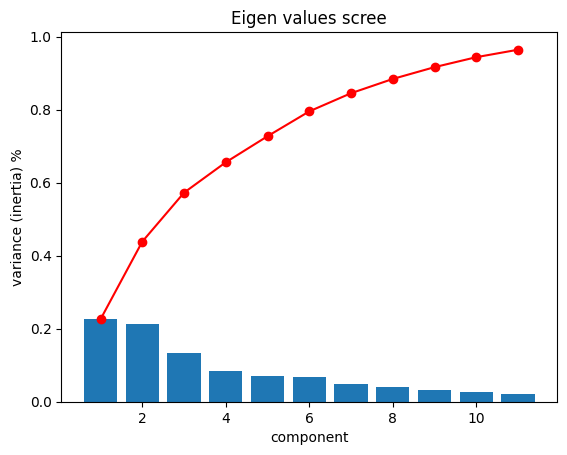

In [ ]:
components = range(1,len(scree)+1)

plt.bar(components, variances)
plt.plot(components, scree, c="red", marker='o')
plt.xlabel("component")
plt.ylabel("variance (inertia) %")
plt.title("Eigen values scree")
plt.show()

## <a id='toc8_3_'></a>[t-SNE](#toc0_)

Sources :
- [t-SNE expliquée](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a)
- [Paramétrage de t-SNE](https://distill.pub/2016/misread-tsne/)
- [Publication originale](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

Quoique plus long que la PCA précédente, l'algorithme t-SNE (*t-distributed Stochastic Neighbor Embedding*) permet de réduire de manière non-linéaire les dimensions tout en gardant un maximum de variance, sur seulement 2 dimensions.  

Cette technique basée sur la similarité (probabilité gaussienne de voisinage à partir des distances euclidiennes) permet au modèle de mieux généraliser et d'interpréter plus facilement les résultats du clustering à venir, grâce à 2 dimensions plus facilement représentables.

2 paramètres sont nécessaires à cet algorithme :
- `n_components`, qui définit le nombre de dimensions souhaité à la fin du traitement, ici 2
- `perplexity`, qui correspond globalement à un nombre de points voisins pour ajuster le modèle (une sorte de tolérance à la variance)

Le nombre de dimensions souhaité étant connu, il reste à déterminer la perplexité.

Le document original préconise une perplexité entre 5 et 50, toutefois, on constate que la divergence (ici, de [Kullback–Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)) diminue beaucoup alors qu'on augmente la perplexité :

In [ ]:
_ = pd.DataFrame(cust_df_pca).sample(frac=0.1, random_state=0)
perplexities = [5, 10, 20, 30, 40, 50, 75, 100, 150, 200, 250, 300, 400]
divergences = []

for i in perplexities:
    model = TSNE(n_components=2, perplexity=i)
    t = model.fit(_)
    divergences.append(model.kl_divergence_)
    print(f"Perplexity {i} => Divergence: {model.kl_divergence_}")

fig = px.line(x=perplexities, y=divergences, markers=True)
fig.update_layout(xaxis_title="Perplexity", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

Perplexity 5 => Divergence: 1.2859135866165161
Perplexity 10 => Divergence: 1.184689998626709
Perplexity 20 => Divergence: 1.1091324090957642
Perplexity 30 => Divergence: 1.0629572868347168
Perplexity 40 => Divergence: 1.0251905918121338
Perplexity 50 => Divergence: 0.9962183237075806
Perplexity 75 => Divergence: 0.923945963382721
Perplexity 100 => Divergence: 0.8649395108222961
Perplexity 150 => Divergence: 0.7722933292388916
Perplexity 200 => Divergence: 0.7045099139213562
Perplexity 250 => Divergence: 0.6514334082603455
Perplexity 300 => Divergence: 0.609451949596405
Perplexity 400 => Divergence: 0.5440354943275452


Visualisation des données (échantillon de 50%) avec différentes perplexités :

In [ ]:
_ = pd.DataFrame(cust_df_pca).sample(frac=0.5, random_state=0)

In [ ]:
# perplexity = 30 (default)
tsne = TSNE(n_components=2)
p30 = tsne.fit_transform(_)

In [ ]:
# perplexity = 100
tsne = TSNE(n_components=2, perplexity=100)
p100 = tsne.fit_transform(_)

In [ ]:
# perplexity = 400
tsne = TSNE(n_components=2, perplexity=400)
p400 = tsne.fit_transform(_)

[Text(0.5, 1.0, 'Perplexity = 30')]

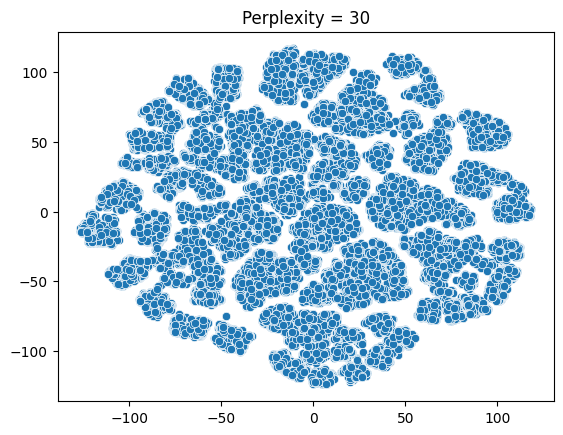

In [ ]:
sns.scatterplot(x=p30[:, 0], y=p30[:, 1]).set(title="Perplexity = 30")

[Text(0.5, 1.0, 'Perplexity = 100')]

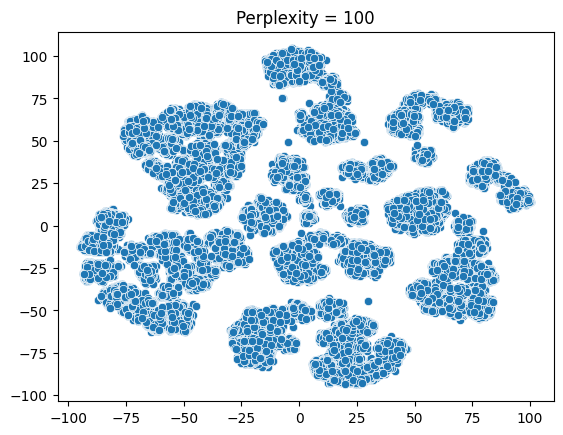

In [ ]:
sns.scatterplot(x=p100[:, 0], y=p100[:, 1]).set(title="Perplexity = 100")

[Text(0.5, 1.0, 'Perplexity = 400')]

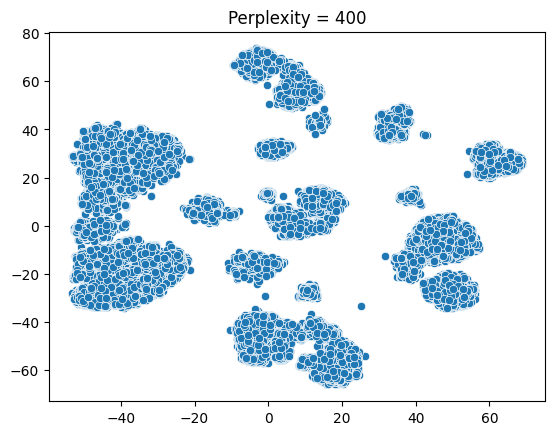

In [ ]:
sns.scatterplot(x=p400[:, 0], y=p400[:, 1]).set(title="Perplexity = 400")

On constate que les groupes sont mieux formés avec une très haute perplexité.

Néanmoins, **une perplexité à 400 pourra être problématique pour de plus petits échantillons**, notamment lors des estimations de maintenance.  
Par exemple, si on souhaite faire un nouveau clustering avec une semaine de données, cela correspondrait à environ 1000 individus environ (sans tenir compte de la saisonnalité, puisque les données représentent 107k individus et 100 semaines de commandes).

Pour mieux coller à nos données, il est donc préférable de choisir une **perplexité élevée mais utilisable** aussi sur ce type d'échantillon, **à savoir 100**.

Cette valeur est fréquemment utilisée comme valeur maximale dans la littérature (cf. sources ci-avant).

In [ ]:
tsne = TSNE(n_components=2, perplexity=100)
cust_df_tsne = tsne.fit_transform(cust_df_pca)

[Text(0.5, 1.0, 'Perplexity = 100')]

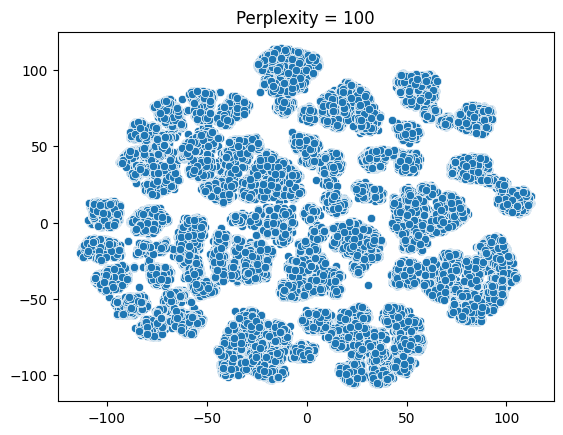

In [ ]:
sns.scatterplot(x=cust_df_tsne[:, 0], y=cust_df_tsne[:, 1])\
    .set(title="Perplexity = 100")

## <a id='toc8_4_'></a>[Fin du pré-traitement des données](#toc0_)

Transformation des données au format DataFrame :

In [ ]:
cust_df_ready = pd.DataFrame(cust_df_tsne)
describe_df(cust_df_ready)

tags    count      mean        std         min        25%       50%  \
0       91043.0 -0.564742  55.708168 -113.310036 -43.908531 -0.648979   
1       91043.0  0.016058  54.430515 -106.115891 -40.768845 -1.641830   

         75%         max  unique     type  nan  nan_pct  
0  46.572411  112.390984   90969  float32    0      0.0  
1  42.180973  114.101288   90957  float32    0      0.0

Distribution des données :

In [ ]:
distri_cor(cust_df_ready, cust_df_ready.columns, boxplot=True)

Sauvegarde des jeux de données

In [ ]:
with open('data.pkl', 'wb') as f: pickle.dump(df, f)
with open('customers.pkl', 'wb') as f: pickle.dump(cust_df, f)
with open('preprocessed.pkl', 'wb') as f: pickle.dump(cust_df_ready, f)